In [1]:
from read_json import *
from spectrum_integrate import *
from plots import *
from source_filter import *
from variability_estimator import *

In [2]:
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.table import Table

In [3]:
## import

path_4lac_dr3_catalog = '../4LAC_catalog_generator_v3/resulting_catalogs/agn_pop_4lac_dr3.ecsv'
table_agn_pop_4lac_dr3 = Table.read(path_4lac_dr3_catalog, format='ascii.ecsv')
df_agn_pop_4lac_dr3 = table_agn_pop_4lac_dr3.to_pandas()

df_agn_pop_4lac_dr3.head()

,Source_Name,RAJ2000,DEJ2000,Redshift,SpectrumType,Pivot_Energy,PL_Flux_Density,PL_Index,LP_Flux_Density,LP_Index,LP_beta,CLASS,SED_class,Variability_Index,Frac_Variability,Unc_Frac_Variability,Flux1000,Unc_Flux1000
0,J0001.2+4741,0.3126,47.685902,-inf,PowerLaw,2420.575195,2.156031e-14,2.271696,2.196550e-14,2.254081,0.012156,bcu,ISP,25.313953,0.675882,0.312850,1.259796e-10,2.877197e-11
1,J0001.2-0747,0.3151,-7.797100,-inf,PowerLaw,1721.603882,2.656894e-13,2.116692,2.842831e-13,2.078927,0.051182,bll,LSP,46.780693,0.406565,0.111870,7.471219e-10,5.041939e-11
2,J0001.4-0010,0.3717,-0.169900,0.461516,PowerLaw,4307.082520,6.067356e-15,1.939160,6.488817e-15,1.661223,0.132438,bll,LSP,9.272764,0.000000,10.000000,1.082246e-10,2.914440e-11
3,J0001.5+2113,0.3815,21.218300,1.106000,LogParabola,329.773743,4.683598e-11,2.654060,5.371562e-11,2.514159,0.159319,fsrq,ISP,1910.935791,0.996138,0.213478,1.347354e-09,6.172809e-11
4,J0001.6-4156,0.4165,-41.942501,-inf,PowerLaw,4047.030029,1.881541e-14,1.775175,2.131597e-14,1.693865,0.072754,bcu,HSP,26.393343,0.490977,0.175782,2.821817e-10,3.090882e-11


In [4]:
## saving our changes in a separate dataframe

df_4lac_luana_dr3 = df_agn_pop_4lac_dr3.copy()

In [5]:
df_4lac_luana_dr3 = df_4lac_luana_dr3.drop(df_4lac_luana_dr3.columns[5:11], axis=1)
df_4lac_luana_dr3 = df_4lac_luana_dr3.drop(columns=['RAJ2000', 'DEJ2000', 'Redshift'])

In [6]:
## adding spectrum flux calculations

spectrum_flux_values = []
spectrum_flux_Flux1000comparison = []

for index, row in df_4lac_luana_dr3.iterrows():
    source_name = row['Source_Name']
    
    ## integrate from 1-100 GeV
    spectrum_flux_test, diff_flux_test, spec_type_test = integrate_spectrum_flux(source_name, df_agn_pop_4lac_dr3, 1, 100)
    spectrum_flux_Flux1000comparison.append(spectrum_flux_test)
    
    ## integrate from 0.1-100 GeV
    spectrum_flux, diff_flux, spec_type = integrate_spectrum_flux(source_name, df_agn_pop_4lac_dr3, 0.1, 100)
    spectrum_flux_values.append(spectrum_flux)

df_4lac_luana_dr3['Spectrum_Flux_Estimated'] = spectrum_flux_values

/Users/luanareis/Documents/GitHub/CTA_AGN_Pop_Variability/4LAC_variability_analysis/spectrum_integrate.py:71: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  flux_from_spectrum = integrate.quad(lambda x: K * ((x/E_0)**(- alpha - beta * np.log(x/E_0))),


### Flux1000 & Unc_Flux1000

Flux1000 = Integral photon flux from 1 to 100 GeV.

Unc Flux1000 = 1$\sigma $ error on integral photon flux from 1 to 100 GeV.

We want to use 4FGL's values of Flux1000 to compare with the Spectrum Flux estimated from 1 to 100 GeV, computed the same way we are using in our analysis, as the 'spectrum_flux_values', but integrated from 0.1 to 100 GeV instead.

In [7]:
# source_names_Flux1000comparison = []
# spectrum_flux_Flux1000comparison = []
# spectrum_flux_calculations = []

# for i in range(len(catalog_data)):
    
#     ## Integrating from 1 - 100 GeV
#     flux_spectrum_Flux1000comparison = calculate_spectrum_flux(catalog_data['Source_Name'][i], 1, 100)
    
#     ## Integrating from 0.1 - 100 GeV
#     flux_spectrum_calculations = calculate_spectrum_flux(catalog_data['Source_Name'][i], 0.1, 100)

#     source_names_Flux1000comparison.append(catalog_data['Source_Name'][i])
#     spectrum_flux_Flux1000comparison.append(flux_spectrum_Flux1000comparison[0])
#     spectrum_flux_calculations.append(flux_spectrum_calculations[0])
     

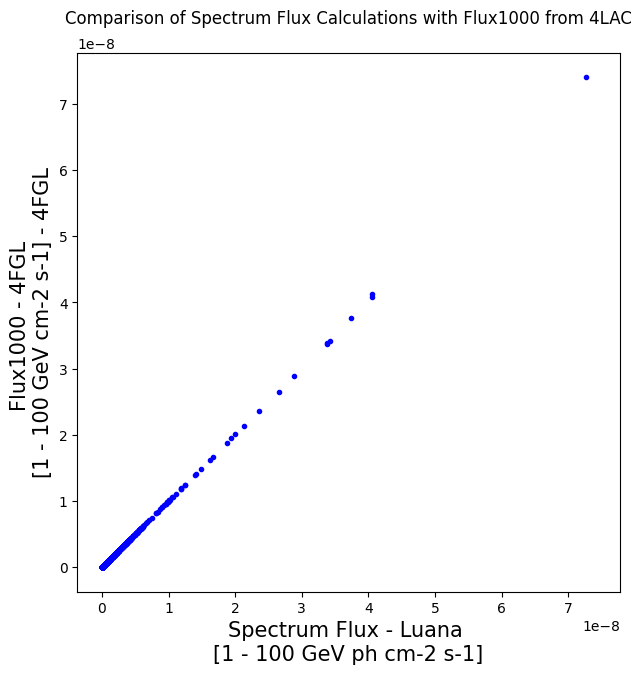

In [8]:
## Spectrum_Flux vs. Flux1000

plt.figure(figsize=(7, 7))

plt.scatter(spectrum_flux_Flux1000comparison, df_4lac_luana_dr3['Flux1000'], marker='.', c='blue')

plt.xlabel('Spectrum Flux - Luana \n[1 - 100 GeV ph cm-2 s-1]', fontsize=15)
plt.ylabel('Flux1000 - 4FGL \n[1 - 100 GeV cm-2 s-1] - 4FGL', fontsize=15)
plt.title('Comparison of Spectrum Flux Calculations with Flux1000 from 4LAC\n', fontsize=12)

plt.savefig('plots/extra/spectrum_flux_crosscheck.png',dpi=300)

plt.xlim(plt.ylim())

plt.show()

In [9]:
df_4lac_luana_dr3 = df_4lac_luana_dr3.drop(columns=['Flux1000', 'Unc_Flux1000'])

In [10]:
source_names = df_4lac_luana_dr3['Source_Name'].tolist()

len(source_names)

3814

In [11]:
## getting a list of the downloaded sources

folder_path = '../4LAC_lightcurve_downloader_v3/resulting_catalogs/input_lightcurve_downloads_v3/fixed_indexed_lightcurves/3days_ts1_fixedindex_lightcurves'

## glob to get all .json files in the folder
json_files = glob.glob(os.path.join(folder_path, '*.json'))
json_file_names = [os.path.basename(file)[5:17] for file in json_files]

len(json_file_names)

1429

In [12]:
## creating a df for the downloaded sources

df_filtered_4lac_luana_dr3 = df_4lac_luana_dr3[df_4lac_luana_dr3['Source_Name'].isin(json_file_names)].copy()
df_filtered_4lac_luana_dr3.reset_index(drop=True, inplace=True)

print(len(df_filtered_4lac_luana_dr3))

1429


In [13]:
df_filtered_4lac_luana_dr3

,Source_Name,SpectrumType,CLASS,SED_class,Variability_Index,Frac_Variability,Unc_Frac_Variability,Spectrum_Flux_Estimated
0,J0001.2-0747,PowerLaw,bll,LSP,46.780693,0.406565,0.111870,9.825299e-09
1,J0001.5+2113,LogParabola,fsrq,ISP,1910.935791,0.996138,0.213478,6.391699e-08
2,J0003.3-1928,LogParabola,bcu,LSP,49.879936,0.591879,0.159972,3.715681e-09
3,J0004.3+4614,LogParabola,fsrq,LSP,139.036758,1.016224,0.234237,1.086787e-08
4,J0004.4-4737,PowerLaw,fsrq,LSP,153.286484,0.823498,0.188146,1.070792e-08
...,...,...,...,...,...,...,...,...
1424,J2358.0-4601,PowerLaw,bcu,LSP,30.538687,0.477398,0.157409,5.184782e-09
1425,J2358.3-1021,LogParabola,fsrq,LSP,195.553940,0.668076,0.150551,2.164930e-08
1426,J2358.3+3830,PowerLaw,bll,NaN,42.173111,0.567347,0.164919,4.248420e-09
1427,J2359.0+3922,PowerLaw,fsrq,LSP,56.146664,0.779921,0.203910,7.005793e-09


In [14]:
json_source_names = df_filtered_4lac_luana_dr3['Source_Name'].tolist()

len(json_source_names)

1429

I think the logic that should govern the study is as follows:
1) we robustly establish the link between variability on a daily scale and variability on a monthly scale
2) we use this link for all sources for which monthly-scale variability is measurable but for which daily-scale variability is not
2bis) the corollary of 2) is that we consider sources as static in our simulations of their variability on a monthly scale is not measurable

In this line of logic, measuring the link between monthly and daily variability in a robust way (step 1) implies :

1a) defining the points treated as ULs (i.e. if I remember correctly, replaced by the average flux -- with what error? -- the slides should make this clear):
-- i.e. points for which the fit has not converged, the error is poorly estimated or the exposure is too low,
-- points for which the flux is not significantly measured: the most stringent criterion suggested by the Fermi-LAT collaboration is TS<4 -> let's adopt this value by default.

1b) select light curves:
-- with sufficient number of points in respect of UL -> let's adopt a default threshold of 50% of points.
-- with variability measured significantly over the monthly scale -> let's adopt the 3sigma threshold in slide 6 by default.

I suggest putting the steps back in this order in the slides, to keep the discussion moving forward.

-> once these steps have been carried out, we still need to determine the value of the proportionality coefficient (and associated error) between variability on a daily scale and variability on a monthly scale. I say “proportionality”, meaning no y-intercept, contrary to what is currently done in slide 9. I suggest (I think I already did in a previous email, apologies if it's not the case) using the scipy.odr package for this fitting.

Each of the default threshold values decided above can be modified. Let's adopt the above default values, then if you wish, let's vary these thresholds one by one to determine the robustness (i.e. systematic uncertainty) of the proportionality coefficient determined.


In [15]:
## 1a - filter points (exposure > 1e7 cm2 s, error != 0, fit_convergence = 0, UL: TS < 4)

# Filter data - step 1:
-  make the point an UL if TS < 4,
-  remove the flux points in which:
    - flux_error = 0,
    - fit_convergence !=0
    - exposure (flux / flux_error²) < 1e7 cm²s

In [16]:
## 3-days

source_names_3days_fixed = []
sigma_nxs_3days_fixed = []
err_sigma_nxs_3days_fixed = []
fvar_3days_fixed = []
unc_fvar_3days_fixed = []

UL_bright_ratio_3days_fixed = []

for source_name in json_source_names:
    
    file_name = f'4FGL+{source_name}.json'
    source_data = Read_json_file(file_name, '3-days', 'fixed')
    source_df = source_data.dataframe
    source_dict = source_data.dictionary
    
    filtered_df = filter_source_flux(source_df)
    
    ## UL check
    bright_ratio = len(filtered_df['flux_upper_limits'].dropna()) / len(filtered_df['flux'].dropna())
    
    if bright_ratio < 1.0:
        UL_bright_ratio_3days_fixed.append(bright_ratio)
        
        variability = Estimate_variability(filtered_df)
        sigma_nxs, err_sigma_nxs, fvar, err_fvar = variability.calculate_variability()
    
        source_names_3days_fixed.append(source_name)
        sigma_nxs_3days_fixed.append(sigma_nxs)
        err_sigma_nxs_3days_fixed.append(err_sigma_nxs)
        fvar_3days_fixed.append(fvar)
        unc_fvar_3days_fixed.append(err_fvar)
    
df_variability_3days_fixed = pd.DataFrame(list(zip(source_names_3days_fixed, UL_bright_ratio_3days_fixed,
                                                     sigma_nxs_3days_fixed, err_sigma_nxs_3days_fixed,
                                                     fvar_3days_fixed, unc_fvar_3days_fixed)),
                                            columns =['Source_Name', 'Bright_Ratio', 'Norm_Excess_Var(3-days)', 'err_Norm_Excess_Var(3-days)',
                                                      'Fvar(3-days)', 'err_Fvar(3-days)'])

/Users/luanareis/Documents/GitHub/CTA_AGN_Pop_Variability/4LAC_variability_analysis/variability_estimator.py:96: RuntimeWarning: invalid value encountered in sqrt
  self.unc_normalized_excess_variance = np.sqrt( (term1)**2 + ( (term2)**2 * self.normalized_excess_variance) )
/Users/luanareis/Documents/GitHub/CTA_AGN_Pop_Variability/4LAC_variability_analysis/variability_estimator.py:96: RuntimeWarning: invalid value encountered in sqrt
  self.unc_normalized_excess_variance = np.sqrt( (term1)**2 + ( (term2)**2 * self.normalized_excess_variance) )
/Users/luanareis/Documents/GitHub/CTA_AGN_Pop_Variability/4LAC_variability_analysis/variability_estimator.py:96: RuntimeWarning: invalid value encountered in sqrt
  self.unc_normalized_excess_variance = np.sqrt( (term1)**2 + ( (term2)**2 * self.normalized_excess_variance) )
/Users/luanareis/Documents/GitHub/CTA_AGN_Pop_Variability/4LAC_variability_analysis/variability_estimator.py:96: RuntimeWarning: invalid value encountered in sqrt
  self.unc_n

In [17]:
df_variability_3days_fixed

,Source_Name,Bright_Ratio,Norm_Excess_Var(3-days),err_Norm_Excess_Var(3-days),Fvar(3-days),err_Fvar(3-days)
0,J0001.5+2113,0.894737,0.544168,0.024961,0.737678,0.016919
1,J0009.3+5030,0.687151,-0.164827,0.009824,0.000000,0.100000
2,J0017.5-0514,0.963899,0.170531,0.032558,0.412954,0.039421
3,J0022.5+0608,0.676951,-0.080619,0.014413,0.000000,0.100000
4,J0030.3-4224,0.790837,0.360065,0.028894,0.600055,0.024076
...,...,...,...,...,...,...
351,J2329.3-4955,0.284454,0.940634,0.015472,0.969863,0.007977
352,J2331.0-2147,0.826196,0.213178,0.026689,0.461712,0.028902
353,J2345.2-1555,0.289507,0.792331,0.022590,0.890130,0.012689
354,J2347.0+5141,0.583193,-0.162044,0.012892,0.000000,0.100000


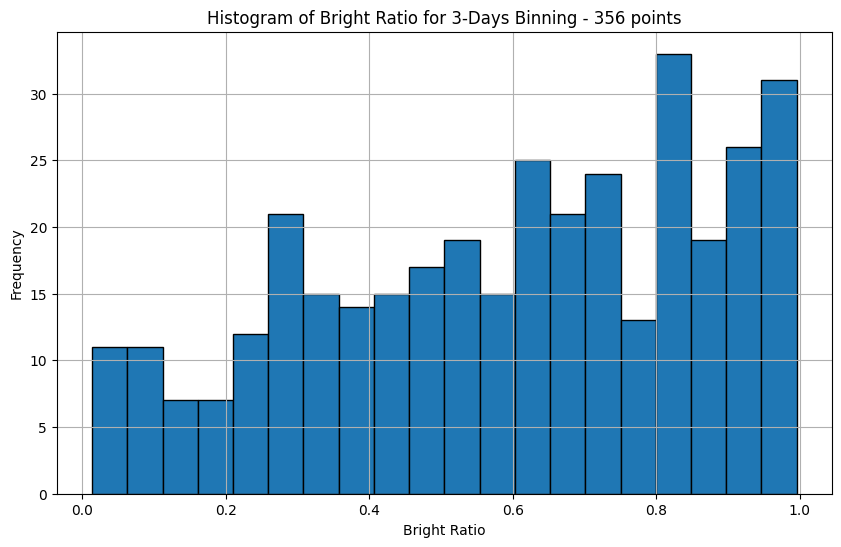

In [18]:
## tests

plt.figure(figsize=(10, 6))
plt.hist(UL_bright_ratio_3days_fixed, bins=20, edgecolor='black')
plt.title(f'Histogram of Bright Ratio for 3-Days Binning - {len(UL_bright_ratio_3days_fixed)} points')
plt.xlabel('Bright Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('plots/extra/bright_ratio_3days_afterFILTER.png',dpi=300)
plt.show()

In [19]:
## weekly

source_names_weekly_fixed = []
sigma_nxs_weekly_fixed = []
err_sigma_nxs_weekly_fixed = []
fvar_weekly_fixed = []
unc_fvar_weekly_fixed = []

UL_bright_ratio_weekly_fixed = []

for source_name in json_source_names:
    
    file_name = f'4FGL+{source_name}.json'
    source_data = Read_json_file(file_name, 'weekly', 'fixed')
    source_df = source_data.dataframe
    source_dict = source_data.dictionary
    
    filtered_df = filter_source_flux(source_df)
    
    ## UL check
    bright_ratio = len(filtered_df['flux_upper_limits'].dropna()) / len(filtered_df['flux'].dropna())
    
    if bright_ratio < 1.0:
        UL_bright_ratio_weekly_fixed.append(bright_ratio)
        
        variability = Estimate_variability(filtered_df)
        sigma_nxs, err_sigma_nxs, fvar, err_fvar = variability.calculate_variability()

        source_names_weekly_fixed.append(source_name)
        sigma_nxs_weekly_fixed.append(sigma_nxs)
        err_sigma_nxs_weekly_fixed.append(err_sigma_nxs)
        fvar_weekly_fixed.append(fvar)
        unc_fvar_weekly_fixed.append(err_fvar)
    
df_variability_weekly_fixed = pd.DataFrame(list(zip(source_names_weekly_fixed, UL_bright_ratio_weekly_fixed,
                                                     sigma_nxs_weekly_fixed, err_sigma_nxs_weekly_fixed,
                                                     fvar_weekly_fixed, unc_fvar_weekly_fixed)),
                                            columns =['Source_Name', 'Bright_Ratio', 'Norm_Excess_Var(weekly)', 'err_Norm_Excess_Var(weekly)',
                                                      'Fvar(weekly)', 'err_Fvar(weekly)'])

/Users/luanareis/Documents/GitHub/CTA_AGN_Pop_Variability/4LAC_variability_analysis/variability_estimator.py:96: RuntimeWarning: invalid value encountered in sqrt
  self.unc_normalized_excess_variance = np.sqrt( (term1)**2 + ( (term2)**2 * self.normalized_excess_variance) )
/Users/luanareis/Documents/GitHub/CTA_AGN_Pop_Variability/4LAC_variability_analysis/variability_estimator.py:96: RuntimeWarning: invalid value encountered in sqrt
  self.unc_normalized_excess_variance = np.sqrt( (term1)**2 + ( (term2)**2 * self.normalized_excess_variance) )
/Users/luanareis/Documents/GitHub/CTA_AGN_Pop_Variability/4LAC_variability_analysis/variability_estimator.py:96: RuntimeWarning: invalid value encountered in sqrt
  self.unc_normalized_excess_variance = np.sqrt( (term1)**2 + ( (term2)**2 * self.normalized_excess_variance) )
/Users/luanareis/Documents/GitHub/CTA_AGN_Pop_Variability/4LAC_variability_analysis/variability_estimator.py:96: RuntimeWarning: invalid value encountered in sqrt
  self.unc_n

In [20]:
df_variability_weekly_fixed

,Source_Name,Bright_Ratio,Norm_Excess_Var(weekly),err_Norm_Excess_Var(weekly),Fvar(weekly),err_Fvar(weekly)
0,J0001.5+2113,0.589147,0.702961,0.028567,0.838427,0.017036
1,J0009.3+5030,0.397933,-0.048938,0.016023,0.000000,0.100000
2,J0011.4+0057,0.987261,0.446012,0.052685,0.667841,0.039444
3,J0017.5-0514,0.652406,0.318380,0.040133,0.564251,0.035563
4,J0021.5-2552,0.953333,-0.092592,0.029667,0.000000,0.100000
...,...,...,...,...,...,...
535,J2331.0-2147,0.650000,0.292794,0.030645,0.541104,0.028317
536,J2338.0-0230,0.888889,0.206616,0.040676,0.454550,0.044743
537,J2345.2-1555,0.233100,1.015617,0.025591,1.007778,0.012697
538,J2347.0+5141,0.345972,-0.039790,0.018133,0.000000,0.100000


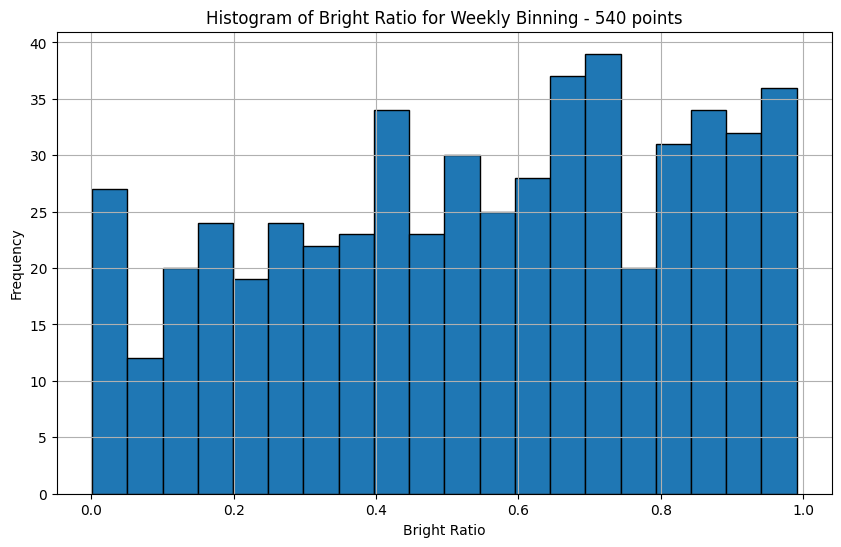

In [21]:
## tests

plt.figure(figsize=(10, 6))
plt.hist(UL_bright_ratio_weekly_fixed, bins=20, edgecolor='black')
plt.title(f'Histogram of Bright Ratio for Weekly Binning - {len(UL_bright_ratio_weekly_fixed)} points')
plt.xlabel('Bright Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('plots/extra/bright_ratio_weekly_afterFILTER.png',dpi=300)
plt.show()

In [22]:
## monthly

source_names_monthly_fixed = []
sigma_nxs_monthly_fixed = []
err_sigma_nxs_monthly_fixed = []
fvar_monthly_fixed = []
unc_fvar_monthly_fixed = []

UL_bright_ratio_monthly_fixed = []

for source_name in json_source_names:
    
    file_name = f'4FGL+{source_name}.json'
    source_data = Read_json_file(file_name, 'monthly', 'fixed')
    source_df = source_data.dataframe
    source_dict = source_data.dictionary
    
    filtered_df = filter_source_flux(source_df)
    
    ## UL check
    if len(filtered_df['flux'].dropna()) != 0:
        bright_ratio = len(filtered_df['flux_upper_limits'].dropna()) / len(filtered_df['flux'].dropna())
    
    if bright_ratio < 1.0:
        UL_bright_ratio_monthly_fixed.append(bright_ratio)
    
        variability = Estimate_variability(filtered_df)
        sigma_nxs, err_sigma_nxs, fvar, err_fvar = variability.calculate_variability()

        source_names_monthly_fixed.append(source_name)
        sigma_nxs_monthly_fixed.append(sigma_nxs)
        err_sigma_nxs_monthly_fixed.append(err_sigma_nxs)
        fvar_monthly_fixed.append(fvar)
        unc_fvar_monthly_fixed.append(err_fvar)
    
df_variability_monthly_fixed = pd.DataFrame(list(zip(source_names_monthly_fixed, UL_bright_ratio_monthly_fixed,
                                                     sigma_nxs_monthly_fixed, err_sigma_nxs_monthly_fixed,
                                                     fvar_monthly_fixed, unc_fvar_monthly_fixed)),
                                            columns =['Source_Name', 'Bright_Ratio', 'Norm_Excess_Var(monthly)', 'err_Norm_Excess_Var(monthly)',
                                                      'Fvar(monthly)', 'err_Fvar(monthly)'])

/Users/luanareis/Documents/GitHub/CTA_AGN_Pop_Variability/4LAC_variability_analysis/variability_estimator.py:96: RuntimeWarning: invalid value encountered in sqrt
  self.unc_normalized_excess_variance = np.sqrt( (term1)**2 + ( (term2)**2 * self.normalized_excess_variance) )
/Users/luanareis/Documents/GitHub/CTA_AGN_Pop_Variability/4LAC_variability_analysis/variability_estimator.py:96: RuntimeWarning: invalid value encountered in sqrt
  self.unc_normalized_excess_variance = np.sqrt( (term1)**2 + ( (term2)**2 * self.normalized_excess_variance) )
/Users/luanareis/Documents/GitHub/CTA_AGN_Pop_Variability/4LAC_variability_analysis/variability_estimator.py:96: RuntimeWarning: invalid value encountered in sqrt
  self.unc_normalized_excess_variance = np.sqrt( (term1)**2 + ( (term2)**2 * self.normalized_excess_variance) )
/Users/luanareis/Documents/GitHub/CTA_AGN_Pop_Variability/4LAC_variability_analysis/variability_estimator.py:96: RuntimeWarning: invalid value encountered in sqrt
  self.unc_n


this source has NO flux points selected!

 -> size ULs: 3
 -> size flux points: 0


/Users/luanareis/Documents/GitHub/CTA_AGN_Pop_Variability/4LAC_variability_analysis/variability_estimator.py:96: RuntimeWarning: invalid value encountered in sqrt
  self.unc_normalized_excess_variance = np.sqrt( (term1)**2 + ( (term2)**2 * self.normalized_excess_variance) )
/Users/luanareis/Documents/GitHub/CTA_AGN_Pop_Variability/4LAC_variability_analysis/variability_estimator.py:96: RuntimeWarning: invalid value encountered in sqrt
  self.unc_normalized_excess_variance = np.sqrt( (term1)**2 + ( (term2)**2 * self.normalized_excess_variance) )
/Users/luanareis/Documents/GitHub/CTA_AGN_Pop_Variability/4LAC_variability_analysis/variability_estimator.py:96: RuntimeWarning: invalid value encountered in sqrt
  self.unc_normalized_excess_variance = np.sqrt( (term1)**2 + ( (term2)**2 * self.normalized_excess_variance) )
/Users/luanareis/Documents/GitHub/CTA_AGN_Pop_Variability/4LAC_variability_analysis/variability_estimator.py:96: RuntimeWarning: invalid value encountered in sqrt
  self.unc_n

In [23]:
df_variability_monthly_fixed

,Source_Name,Bright_Ratio,Norm_Excess_Var(monthly),err_Norm_Excess_Var(monthly),Fvar(monthly),err_Fvar(monthly)
0,J0001.2-0747,0.538462,-0.100559,0.022187,0.000000,0.100000
1,J0001.5+2113,0.373737,1.035276,0.036008,1.017485,0.017695
2,J0003.3-1928,0.976744,-0.121449,0.017513,0.000000,0.100000
3,J0004.4-4737,0.959184,0.156405,0.048972,0.395481,0.061915
4,J0009.3+5030,0.078788,0.120650,0.022296,0.347346,0.032095
...,...,...,...,...,...,...
944,J2348.0-1630,0.079755,0.746465,0.023992,0.863982,0.013885
945,J2350.6-3005,0.826087,-0.062034,0.052921,0.000000,0.100000
946,J2357.8-5311,0.866667,0.238690,0.057975,0.488559,0.059333
947,J2358.3-1021,0.558824,0.217351,0.040748,0.466209,0.043702


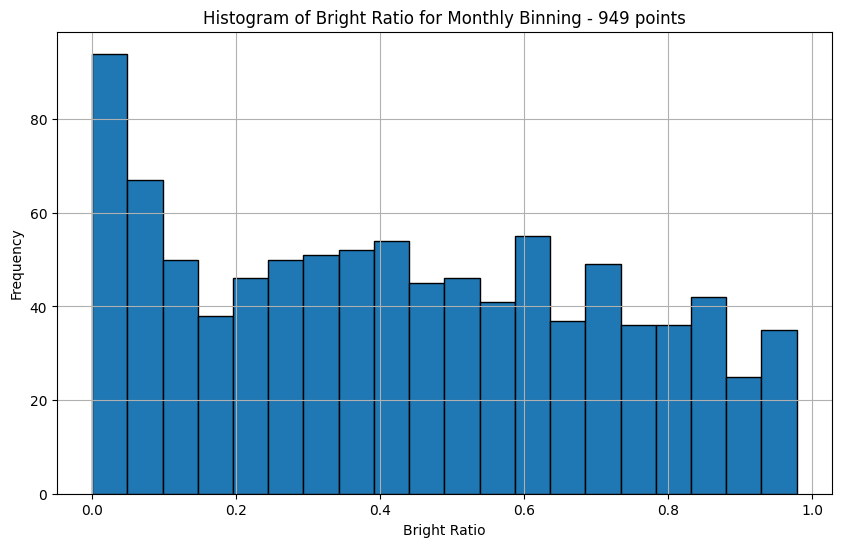

In [24]:
## tests

plt.figure(figsize=(10, 6))
plt.hist(UL_bright_ratio_monthly_fixed, bins=20, edgecolor='black')
plt.title(f'Histogram of Bright Ratio for Monthly Binning - {len(UL_bright_ratio_monthly_fixed)} points')
plt.xlabel('Bright Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('plots/extra/bright_ratio_monthly_afterFILTER.png',dpi=300)
plt.show()

In [25]:
df_variability_3days_fixed

,Source_Name,Bright_Ratio,Norm_Excess_Var(3-days),err_Norm_Excess_Var(3-days),Fvar(3-days),err_Fvar(3-days)
0,J0001.5+2113,0.894737,0.544168,0.024961,0.737678,0.016919
1,J0009.3+5030,0.687151,-0.164827,0.009824,0.000000,0.100000
2,J0017.5-0514,0.963899,0.170531,0.032558,0.412954,0.039421
3,J0022.5+0608,0.676951,-0.080619,0.014413,0.000000,0.100000
4,J0030.3-4224,0.790837,0.360065,0.028894,0.600055,0.024076
...,...,...,...,...,...,...
351,J2329.3-4955,0.284454,0.940634,0.015472,0.969863,0.007977
352,J2331.0-2147,0.826196,0.213178,0.026689,0.461712,0.028902
353,J2345.2-1555,0.289507,0.792331,0.022590,0.890130,0.012689
354,J2347.0+5141,0.583193,-0.162044,0.012892,0.000000,0.100000


In [26]:
## 1b - select light curves with 50% number of flux points in respect of UL

## Filter data - step 2:
## remove source if n° Upper Limits > n° flux measurements

In [27]:
# ## replace values with NaN if 'Bright_Ratio' is higher than 1.0
# df_variability_3days_fixed.loc[df_variability_3days_fixed['Bright_Ratio']>1.0, ['Norm_Excess_Var(3-days)', 'err_Norm_Excess_Var(3-days)', 'Fvar(3-days)', 'err_Fvar(3-days)']] = np.nan
# df_variability_weekly_fixed.loc[df_variability_weekly_fixed['Bright_Ratio']>1.0, ['Norm_Excess_Var(weekly)', 'err_Norm_Excess_Var(weekly)', 'Fvar(weekly)', 'err_Fvar(weekly)']] = np.nan
# df_variability_monthly_fixed.loc[df_variability_monthly_fixed['Bright_Ratio']>1.0, ['Norm_Excess_Var(monthly)', 'err_Norm_Excess_Var(monthly)', 'Fvar(monthly)', 'err_Fvar(monthly)']] = np.nan

In [28]:
# ## selected sources
# df_subset_3days = df_variability_3days_fixed.dropna(subset=['Norm_Excess_Var(3-days)', 'err_Norm_Excess_Var(3-days)', 'Fvar(3-days)', 'err_Fvar(3-days)'])
# df_subset_weekly = df_variability_weekly_fixed.dropna(subset=['Norm_Excess_Var(weekly)', 'err_Norm_Excess_Var(weekly)', 'Fvar(weekly)', 'err_Fvar(weekly)'])
# df_subset_monthly = df_variability_monthly_fixed.dropna(subset=['Norm_Excess_Var(monthly)', 'err_Norm_Excess_Var(monthly)', 'Fvar(monthly)', 'err_Fvar(monthly)'])

In [29]:
## selected sources
df_subset_3days = df_variability_3days_fixed.dropna(subset=['Norm_Excess_Var(3-days)', 'err_Norm_Excess_Var(3-days)', 'Fvar(3-days)', 'err_Fvar(3-days)'])
df_subset_weekly = df_variability_weekly_fixed.dropna(subset=['Norm_Excess_Var(weekly)', 'err_Norm_Excess_Var(weekly)', 'Fvar(weekly)', 'err_Fvar(weekly)'])
df_subset_monthly = df_variability_monthly_fixed.dropna(subset=['Norm_Excess_Var(monthly)', 'err_Norm_Excess_Var(monthly)', 'Fvar(monthly)', 'err_Fvar(monthly)'])

In [30]:
df_subset_3days

,Source_Name,Bright_Ratio,Norm_Excess_Var(3-days),err_Norm_Excess_Var(3-days),Fvar(3-days),err_Fvar(3-days)
0,J0001.5+2113,0.894737,0.544168,0.024961,0.737678,0.016919
1,J0009.3+5030,0.687151,-0.164827,0.009824,0.000000,0.100000
2,J0017.5-0514,0.963899,0.170531,0.032558,0.412954,0.039421
3,J0022.5+0608,0.676951,-0.080619,0.014413,0.000000,0.100000
4,J0030.3-4224,0.790837,0.360065,0.028894,0.600055,0.024076
...,...,...,...,...,...,...
351,J2329.3-4955,0.284454,0.940634,0.015472,0.969863,0.007977
352,J2331.0-2147,0.826196,0.213178,0.026689,0.461712,0.028902
353,J2345.2-1555,0.289507,0.792331,0.022590,0.890130,0.012689
354,J2347.0+5141,0.583193,-0.162044,0.012892,0.000000,0.100000


In [31]:
df_subset_weekly

,Source_Name,Bright_Ratio,Norm_Excess_Var(weekly),err_Norm_Excess_Var(weekly),Fvar(weekly),err_Fvar(weekly)
0,J0001.5+2113,0.589147,0.702961,0.028567,0.838427,0.017036
1,J0009.3+5030,0.397933,-0.048938,0.016023,0.000000,0.100000
2,J0011.4+0057,0.987261,0.446012,0.052685,0.667841,0.039444
3,J0017.5-0514,0.652406,0.318380,0.040133,0.564251,0.035563
4,J0021.5-2552,0.953333,-0.092592,0.029667,0.000000,0.100000
...,...,...,...,...,...,...
535,J2331.0-2147,0.650000,0.292794,0.030645,0.541104,0.028317
536,J2338.0-0230,0.888889,0.206616,0.040676,0.454550,0.044743
537,J2345.2-1555,0.233100,1.015617,0.025591,1.007778,0.012697
538,J2347.0+5141,0.345972,-0.039790,0.018133,0.000000,0.100000


In [32]:
df_subset_monthly

,Source_Name,Bright_Ratio,Norm_Excess_Var(monthly),err_Norm_Excess_Var(monthly),Fvar(monthly),err_Fvar(monthly)
0,J0001.2-0747,0.538462,-0.100559,0.022187,0.000000,0.100000
1,J0001.5+2113,0.373737,1.035276,0.036008,1.017485,0.017695
2,J0003.3-1928,0.976744,-0.121449,0.017513,0.000000,0.100000
3,J0004.4-4737,0.959184,0.156405,0.048972,0.395481,0.061915
4,J0009.3+5030,0.078788,0.120650,0.022296,0.347346,0.032095
...,...,...,...,...,...,...
944,J2348.0-1630,0.079755,0.746465,0.023992,0.863982,0.013885
945,J2350.6-3005,0.826087,-0.062034,0.052921,0.000000,0.100000
946,J2357.8-5311,0.866667,0.238690,0.057975,0.488559,0.059333
947,J2358.3-1021,0.558824,0.217351,0.040748,0.466209,0.043702


In [33]:
print('AFTER UPPER LIMIT 50% cut:')
print('3-days bin:', len(df_subset_3days), 'sources')
print('Weekly bin:', len(df_subset_weekly), 'sources')
print('Monthly bin:', len(df_subset_monthly), 'sources')

AFTER UPPER LIMIT 50% cut:
3-days bin: 325 sources
Weekly bin: 514 sources
Monthly bin: 917 sources


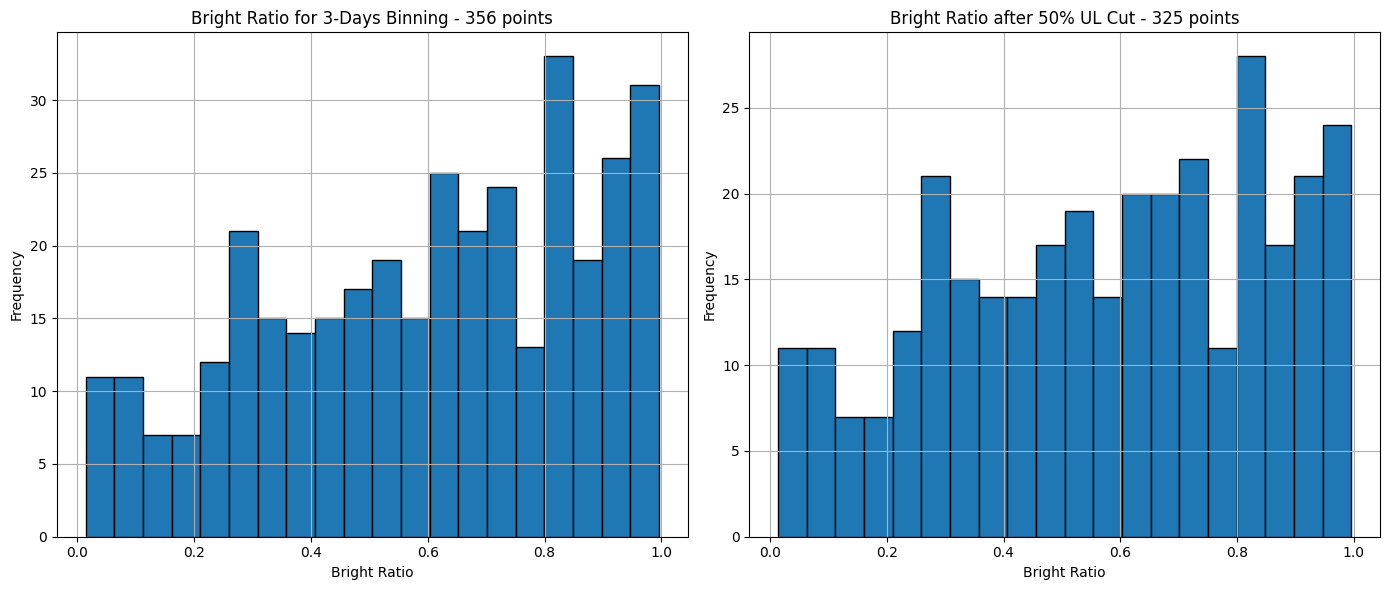

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

## ratio for all sources
ax1.hist(UL_bright_ratio_3days_fixed, bins=20, edgecolor='black')
ax1.set_title(f'Bright Ratio for 3-Days Binning - {len(UL_bright_ratio_3days_fixed)} points')
ax1.set_xlabel('Bright Ratio')
ax1.set_ylabel('Frequency')
ax1.grid(True)


x = df_subset_3days['Bright_Ratio']
## after filter
ax2.hist(df_subset_3days['Bright_Ratio'], bins=20, edgecolor='black')
ax2.set_title(f'Bright Ratio after 50% UL Cut - {len(x)} points')
ax2.set_xlabel('Bright Ratio')
ax2.set_ylabel('Frequency')
ax2.grid(True)

plt.tight_layout()

plt.savefig('plots/extra/bright_ratio_3days_comparison.png', dpi=300)
plt.show()


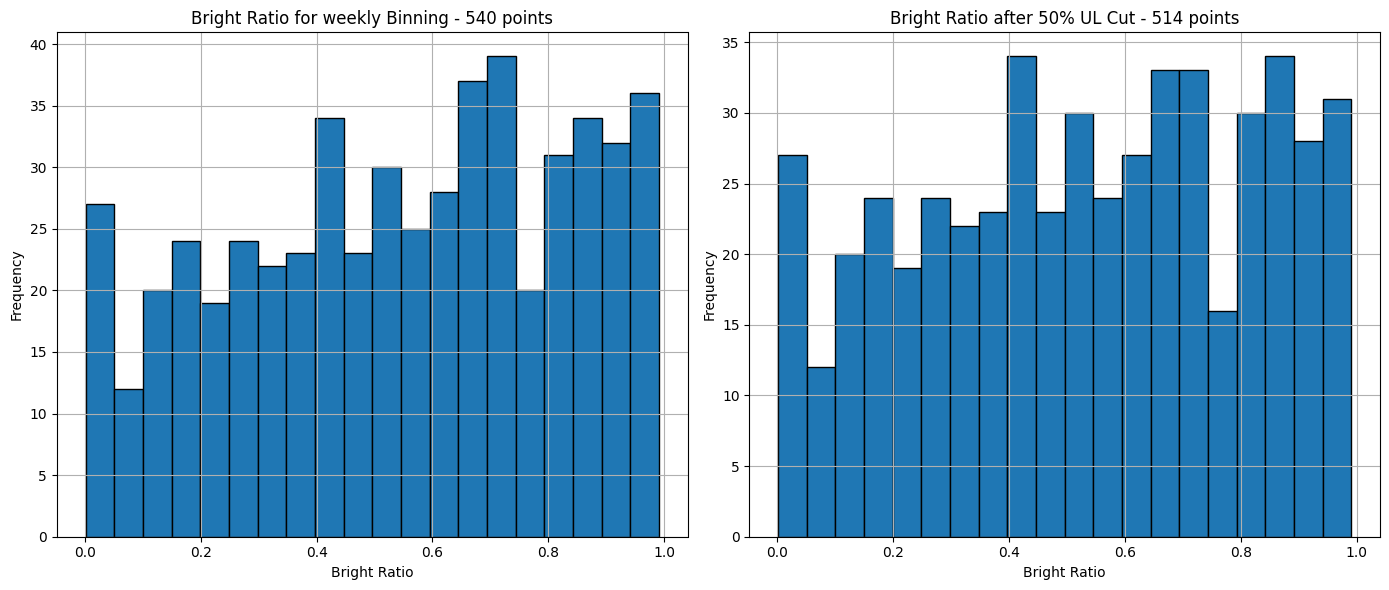

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

## ratio for all sources
ax1.hist(UL_bright_ratio_weekly_fixed, bins=20, edgecolor='black')
ax1.set_title(f'Bright Ratio for weekly Binning - {len(UL_bright_ratio_weekly_fixed)} points')
ax1.set_xlabel('Bright Ratio')
ax1.set_ylabel('Frequency')
ax1.grid(True)

x = df_subset_weekly['Bright_Ratio']
## after filter
ax2.hist(df_subset_weekly['Bright_Ratio'], bins=20, edgecolor='black')
ax2.set_title(f'Bright Ratio after 50% UL Cut - {len(x)} points')
ax2.set_xlabel('Bright Ratio')
ax2.set_ylabel('Frequency')
ax2.grid(True)

plt.tight_layout()

plt.savefig('plots/extra/bright_ratio_weekly_comparison.png', dpi=300)
plt.show()


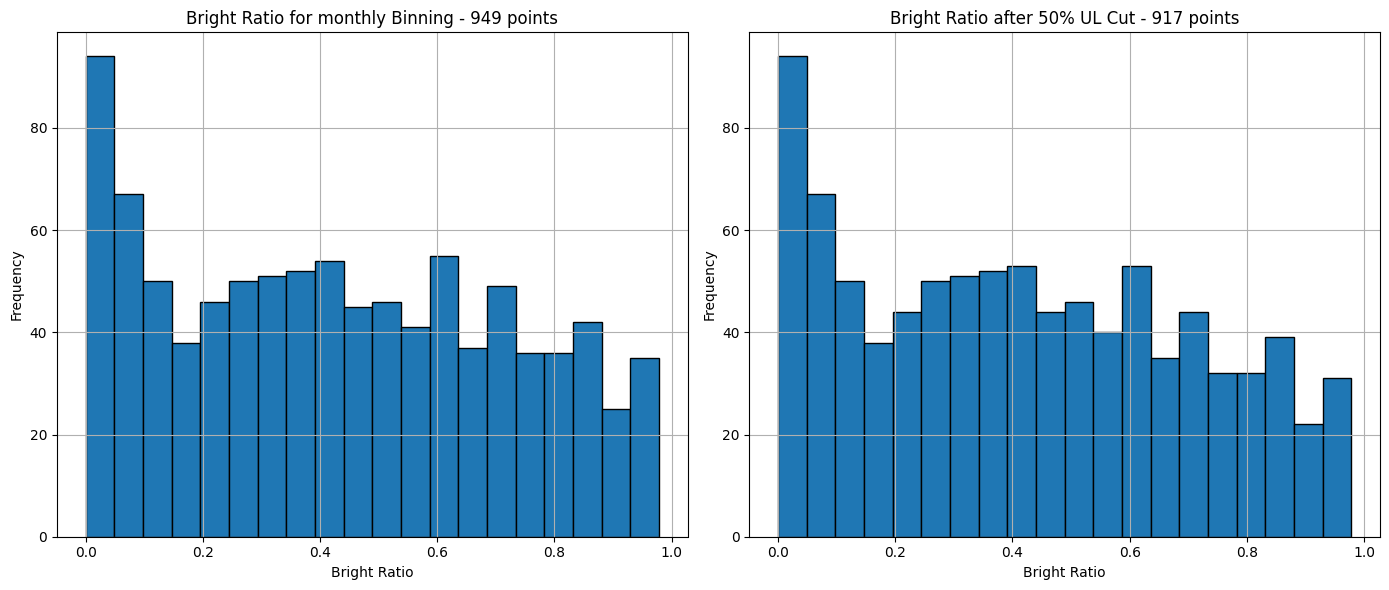

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

## ratio for all sources
ax1.hist(UL_bright_ratio_monthly_fixed, bins=20, edgecolor='black')
ax1.set_title(f'Bright Ratio for monthly Binning - {len(UL_bright_ratio_monthly_fixed)} points')
ax1.set_xlabel('Bright Ratio')
ax1.set_ylabel('Frequency')
ax1.grid(True)

x = df_subset_monthly['Bright_Ratio']
## after filter
ax2.hist(df_subset_monthly['Bright_Ratio'], bins=20, edgecolor='black')
ax2.set_title(f'Bright Ratio after 50% UL Cut - {len(x)} points')
ax2.set_xlabel('Bright Ratio')
ax2.set_ylabel('Frequency')
ax2.grid(True)

plt.tight_layout()

plt.savefig('plots/extra/bright_ratio_monthly_comparison.png', dpi=300)
plt.show()


In [37]:
## droping the bright ratio column
df_subset_3days = df_subset_3days.drop(columns=['Bright_Ratio'])
df_subset_weekly = df_subset_weekly.drop(columns=['Bright_Ratio'])
df_subset_monthly = df_subset_monthly.drop(columns=['Bright_Ratio'])

In [38]:
## 1b - select significant variability in monthly: 3 sigma threshold

In [39]:
## determine the value of the proportionality (no y intercept) using scipy.odr coefficient (& error) between variability on a daily scale and monthly scale

In [40]:
df_subset_3days[df_subset_3days['Norm_Excess_Var(3-days)']>10]

,Source_Name,Norm_Excess_Var(3-days),err_Norm_Excess_Var(3-days),Fvar(3-days),err_Fvar(3-days)


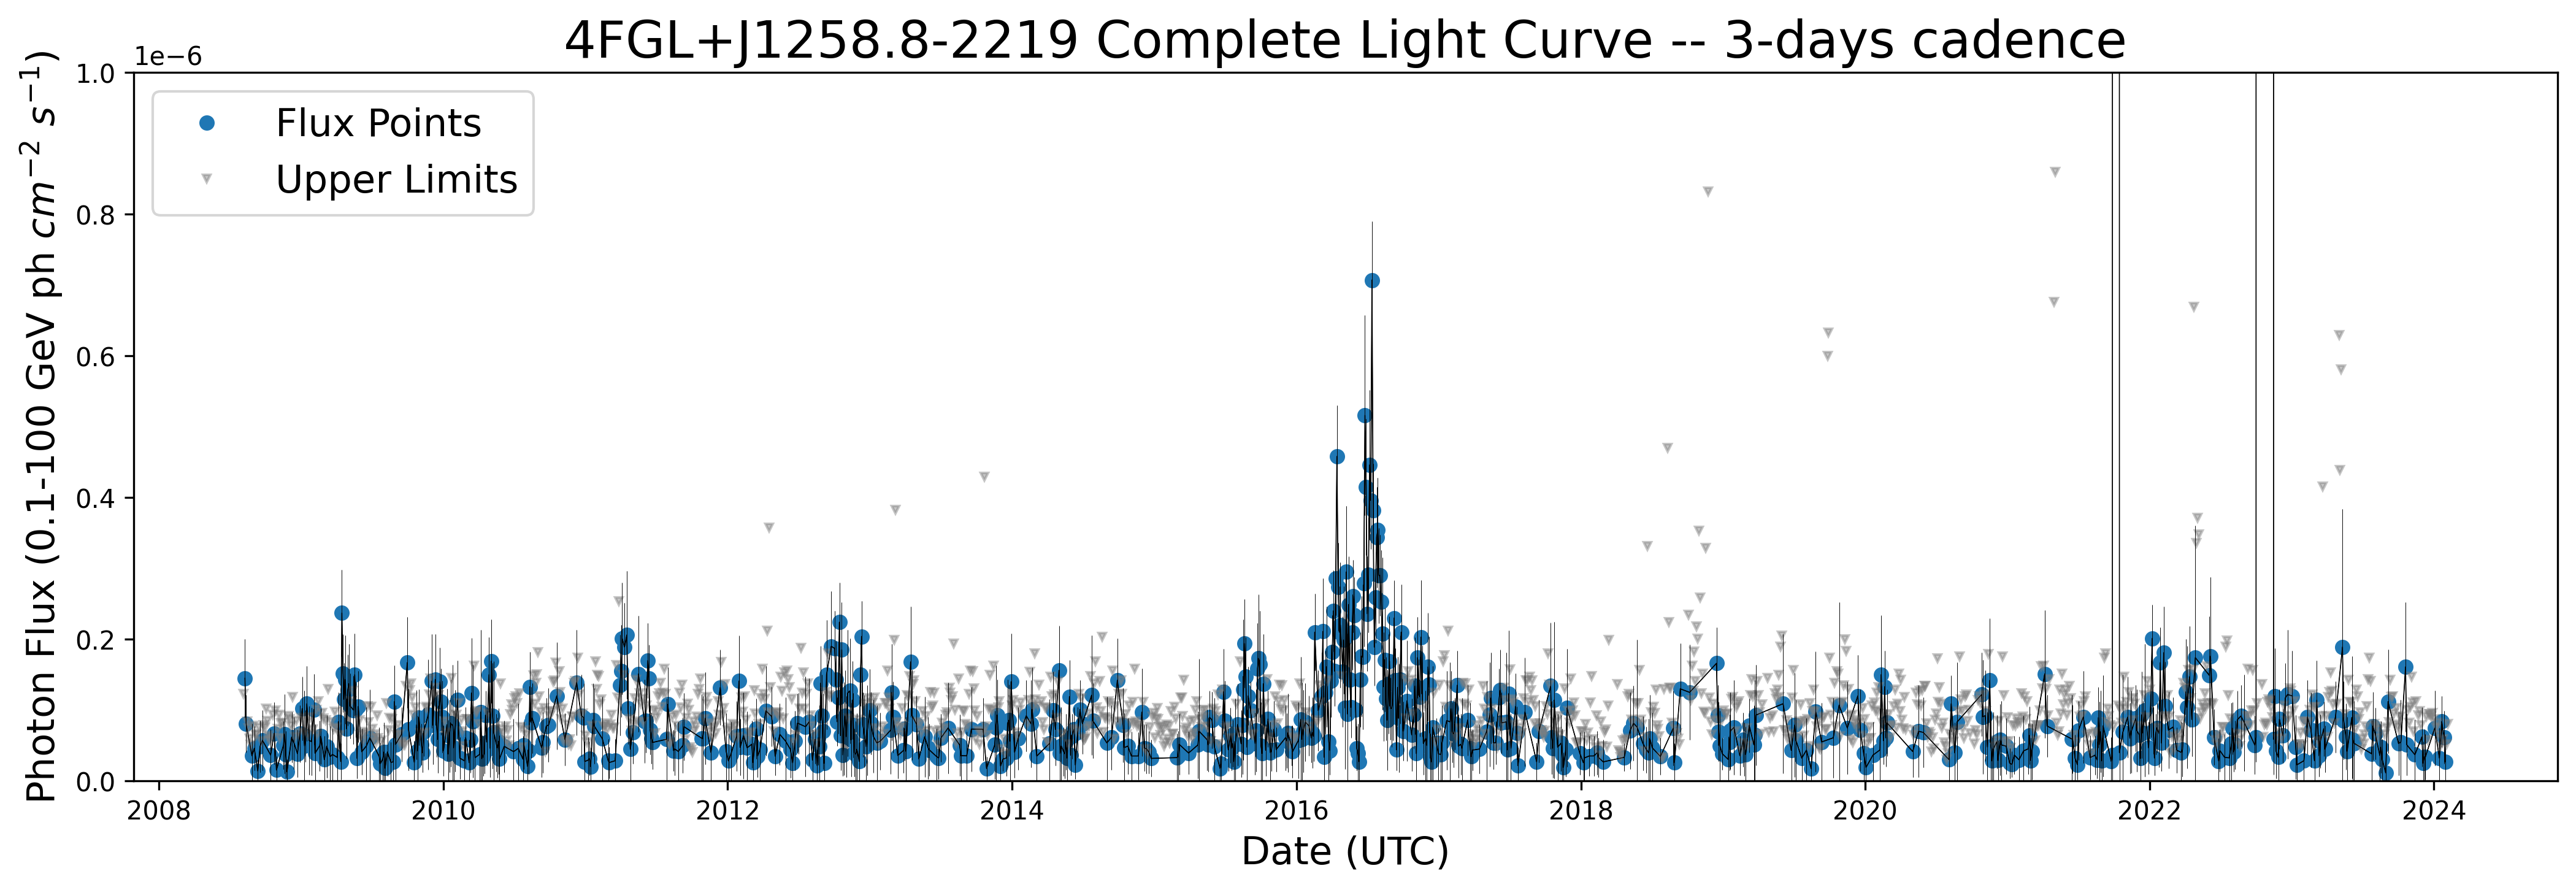

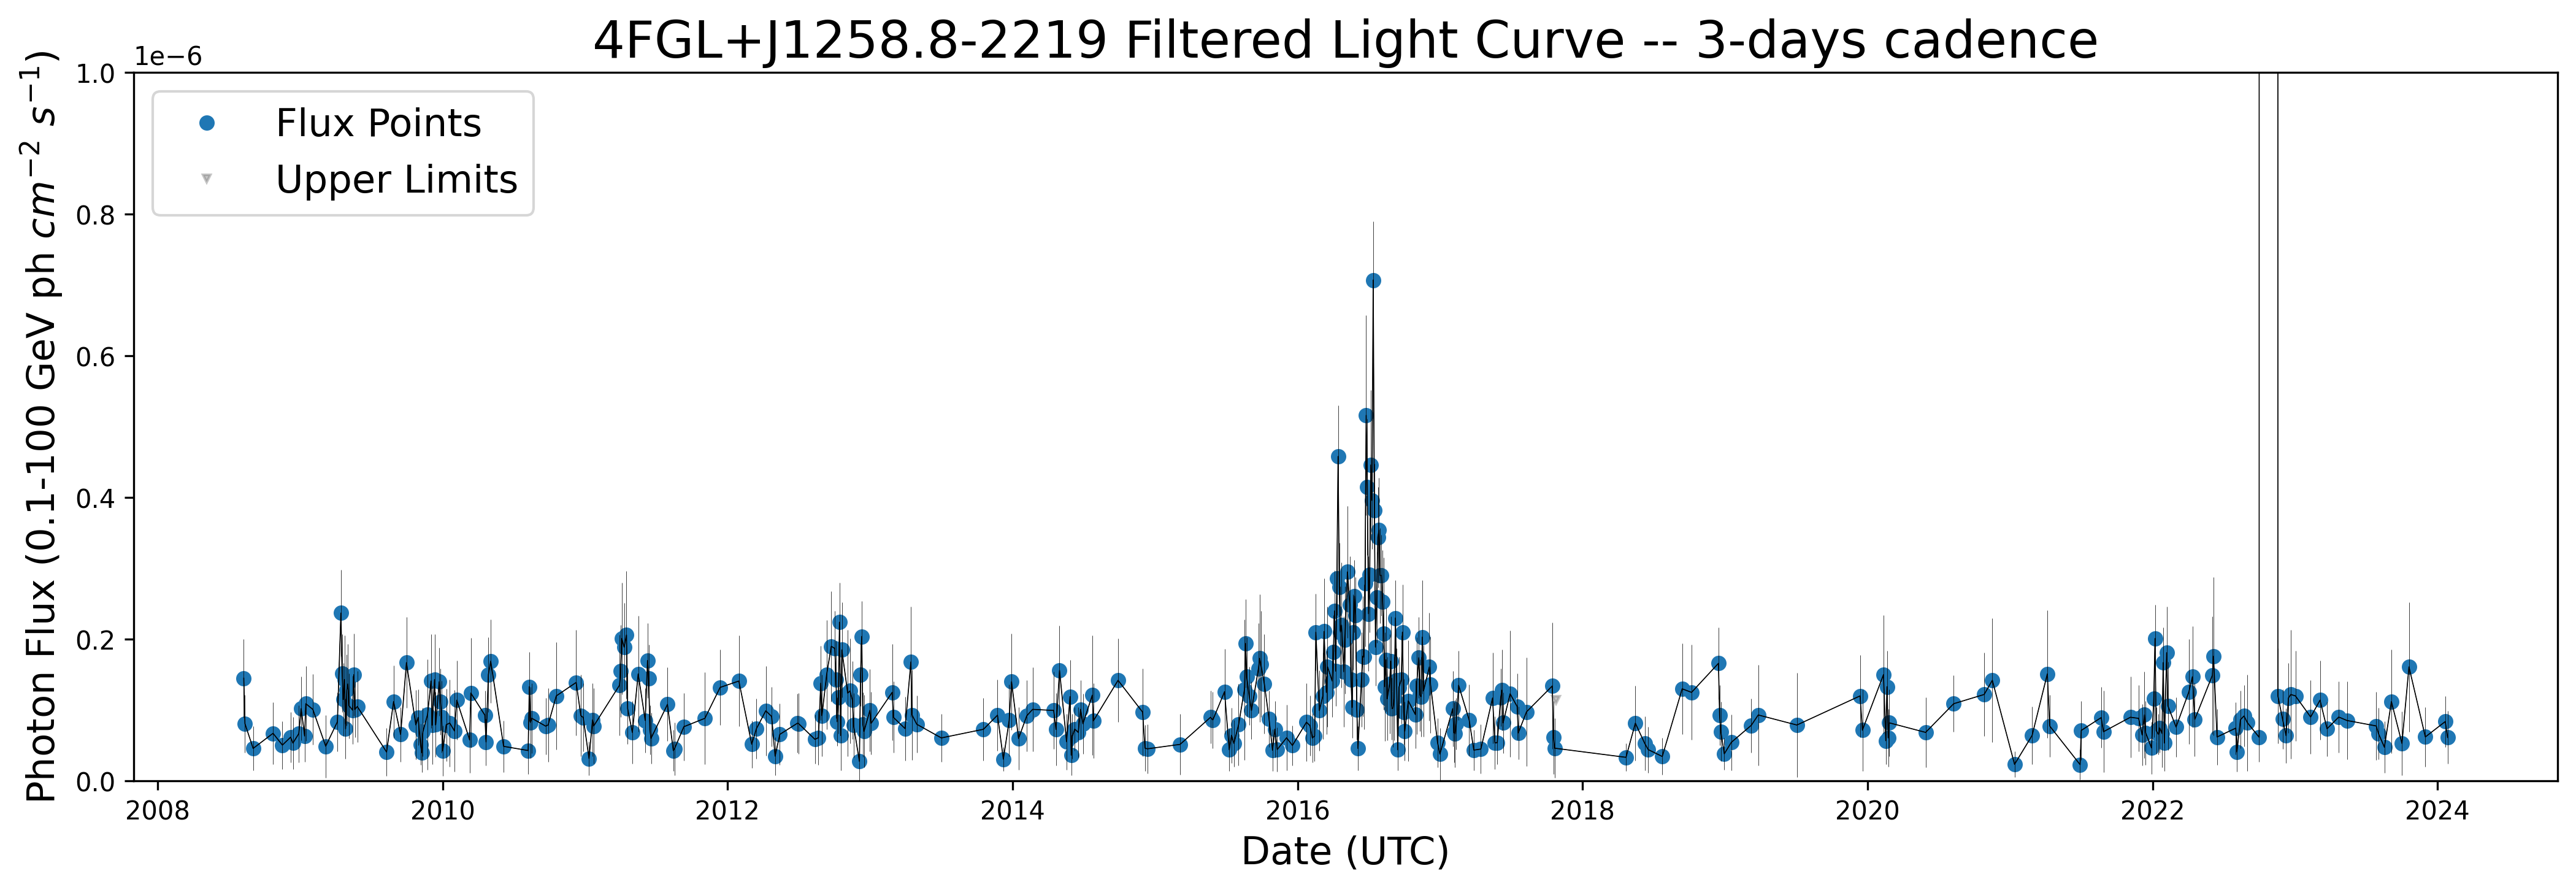

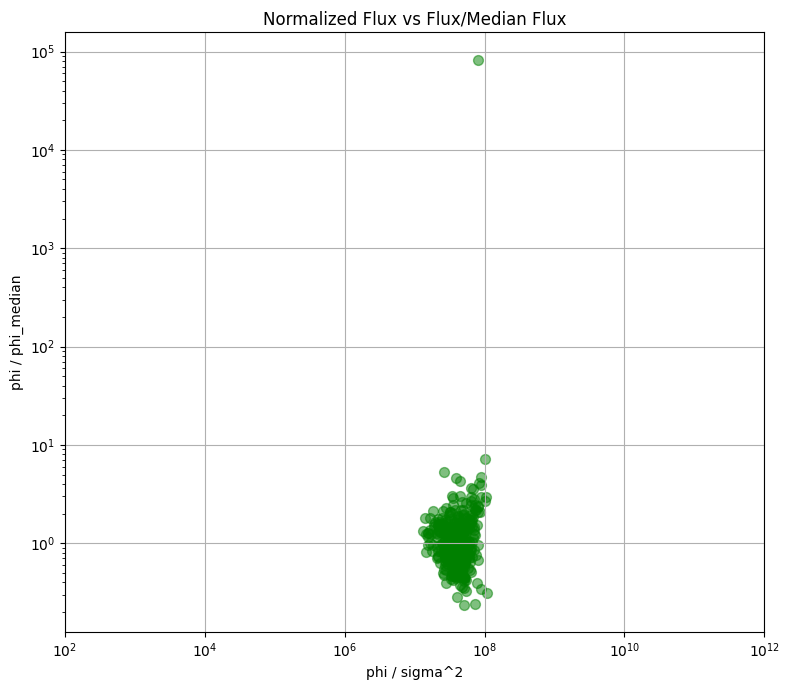

In [41]:
## plotting to check
    
file_name = f'4FGL+J1258.8-2219.json'
source_data = Read_json_file(file_name, '3-days', 'fixed')
source_df = source_data.dataframe
source_dict = source_data.dictionary

filtered_df = filter_source_flux(source_df)

plots = Plots(file_name[5:-5], df_agn_pop_4lac_dr3, source_dict, filtered_df)
plots.lightcurve_complete('3-days', 1e-6)
plots.lightcurve_filtered('3-days', 1e-6)
# plots.spectrum(power=12, x_dlim=0.06, x_ulim=120, y_dlim=10, y_ulim=150)
plots.exposure()

In [42]:
# ### testing without 50% cut for monthly

# ## monthly

# source_names_monthly_test = []
# sigma_nxs_monthly_test = []
# err_sigma_nxs_monthly_test = []
# fvar_monthly_test = []
# unc_fvar_monthly_test = []

# for source_name in bin_monthly:
    
#     file_name = f'4FGL+{source_name}.json'
#     source_data = Read_json_file(file_name, 'monthly', 'fixed')
#     source_df = source_data.dataframe
#     source_dict = source_data.dictionary
    
#     # filtered_df = filter_source_flux(source_df)
#     filtered_df = source_df
    
#     variability = Estimate_variability(filtered_df)
#     sigma_nxs, err_sigma_nxs, fvar, err_fvar = variability.calculate_variability()
    
#     source_names_monthly_test.append(source_name)
#     sigma_nxs_monthly_test.append(sigma_nxs)
#     err_sigma_nxs_monthly_test.append(err_sigma_nxs)
#     fvar_monthly_test.append(fvar)
#     unc_fvar_monthly_test.append(err_fvar)
    
# df_variability_monthly_test = pd.DataFrame(list(zip(source_names_monthly_test,
#                                                      sigma_nxs_monthly_test, err_sigma_nxs_monthly_test,
#                                                      fvar_monthly_test, unc_fvar_monthly_test)),
#                                             columns =['Source_Name', 'Norm_Excess_Var(monthly-t)', 'err_Norm_Excess_Var(monthly-t)',
#                                                       'Fvar(monthly-t)', 'err_Fvar(monthly-t)'])

In [43]:
## merging our estimates

df_filtered_4lac_luana_dr3 = df_filtered_4lac_luana_dr3.merge(df_subset_3days, on='Source_Name', how='left')
df_filtered_4lac_luana_dr3 = df_filtered_4lac_luana_dr3.merge(df_subset_weekly, on='Source_Name', how='left')
df_filtered_4lac_luana_dr3 = df_filtered_4lac_luana_dr3.merge(df_subset_monthly, on='Source_Name', how='left')

In [44]:
# ## testing
# df_filtered_4lac_luana_dr3 = df_filtered_4lac_luana_dr3.merge(df_variability_monthly_test, on='Source_Name', how='left')

In [45]:
df_filtered_4lac_luana_dr3

,Source_Name,SpectrumType,CLASS,SED_class,Variability_Index,Frac_Variability,Unc_Frac_Variability,Spectrum_Flux_Estimated,Norm_Excess_Var(3-days),err_Norm_Excess_Var(3-days),Fvar(3-days),err_Fvar(3-days),Norm_Excess_Var(weekly),err_Norm_Excess_Var(weekly),Fvar(weekly),err_Fvar(weekly),Norm_Excess_Var(monthly),err_Norm_Excess_Var(monthly),Fvar(monthly),err_Fvar(monthly)
0,J0001.2-0747,PowerLaw,bll,LSP,46.780693,0.406565,0.111870,9.825299e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.100559,0.022187,0.000000,0.100000
1,J0001.5+2113,LogParabola,fsrq,ISP,1910.935791,0.996138,0.213478,6.391699e-08,0.544168,0.024961,0.737678,0.016919,0.702961,0.028567,0.838427,0.017036,1.035276,0.036008,1.017485,0.017695
2,J0003.3-1928,LogParabola,bcu,LSP,49.879936,0.591879,0.159972,3.715681e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.121449,0.017513,0.000000,0.100000
3,J0004.3+4614,LogParabola,fsrq,LSP,139.036758,1.016224,0.234237,1.086787e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,J0004.4-4737,PowerLaw,fsrq,LSP,153.286484,0.823498,0.188146,1.070792e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156405,0.048972,0.395481,0.061915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,J2358.0-4601,PowerLaw,bcu,LSP,30.538687,0.477398,0.157409,5.184782e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1425,J2358.3-1021,LogParabola,fsrq,LSP,195.553940,0.668076,0.150551,2.164930e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.217351,0.040748,0.466209,0.043702
1426,J2358.3+3830,PowerLaw,bll,NaN,42.173111,0.567347,0.164919,4.248420e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.122507,0.020446,0.000000,0.100000
1427,J2359.0+3922,PowerLaw,fsrq,LSP,56.146664,0.779921,0.203910,7.005793e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
## merging our estimates

df_4lac_luana_dr3 = df_4lac_luana_dr3.merge(df_subset_3days, on='Source_Name', how='left')
df_4lac_luana_dr3 = df_4lac_luana_dr3.merge(df_subset_weekly, on='Source_Name', how='left')
df_4lac_luana_dr3 = df_4lac_luana_dr3.merge(df_subset_monthly, on='Source_Name', how='left')

In [47]:
df_4lac_luana_dr3

,Source_Name,SpectrumType,CLASS,SED_class,Variability_Index,Frac_Variability,Unc_Frac_Variability,Spectrum_Flux_Estimated,Norm_Excess_Var(3-days),err_Norm_Excess_Var(3-days),Fvar(3-days),err_Fvar(3-days),Norm_Excess_Var(weekly),err_Norm_Excess_Var(weekly),Fvar(weekly),err_Fvar(weekly),Norm_Excess_Var(monthly),err_Norm_Excess_Var(monthly),Fvar(monthly),err_Fvar(monthly)
0,J0001.2+4741,PowerLaw,bcu,ISP,25.313953,0.675882,0.312850,1.993321e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,J0001.2-0747,PowerLaw,bll,LSP,46.780693,0.406565,0.111870,9.825299e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.100559,0.022187,0.000000,0.100000
2,J0001.4-0010,PowerLaw,bll,LSP,9.272764,0.000000,10.000000,8.602307e-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,J0001.5+2113,LogParabola,fsrq,ISP,1910.935791,0.996138,0.213478,6.391699e-08,0.544168,0.024961,0.737678,0.016919,0.702961,0.028567,0.838427,0.017036,1.035276,0.036008,1.017485,0.017695
4,J0001.6-4156,PowerLaw,bcu,HSP,26.393343,0.490977,0.175782,1.599132e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,J2359.3+0215,LogParabola,bcu,LSP,16.065315,0.311971,0.625833,1.655760e-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3810,J2359.3-2049,PowerLaw,bll,LSP,14.043210,0.177217,0.190973,3.021906e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3811,J2359.7-5041,LogParabola,bcu,LSP,7.732565,0.000000,10.000000,1.205902e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3812,J2359.9-3736,PowerLaw,bcu,LSP,8.143241,0.000000,10.000000,2.216054e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


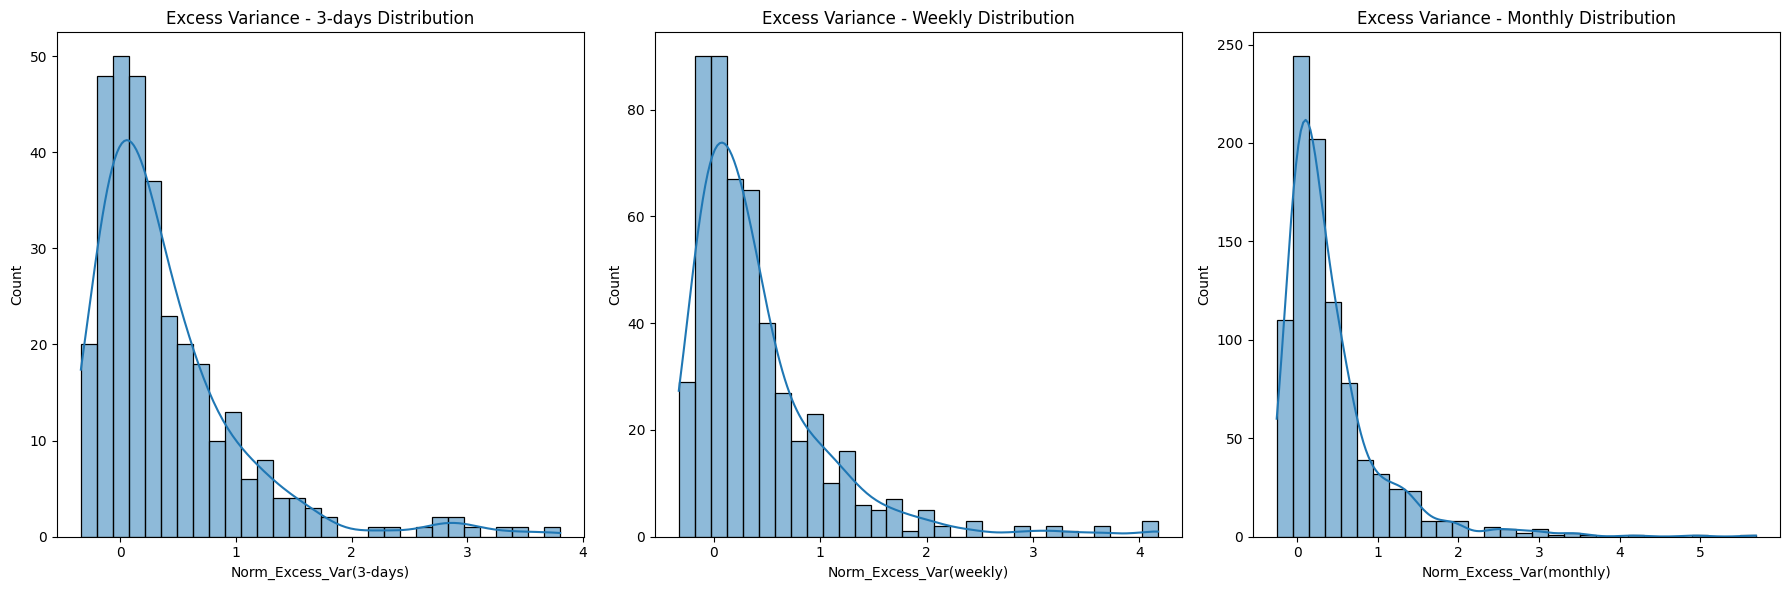

In [48]:
## Histograms

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.histplot(df_filtered_4lac_luana_dr3['Norm_Excess_Var(3-days)'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Excess Variance - 3-days Distribution')

sns.histplot(df_filtered_4lac_luana_dr3['Norm_Excess_Var(weekly)'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Excess Variance - Weekly Distribution')

sns.histplot(df_filtered_4lac_luana_dr3['Norm_Excess_Var(monthly)'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Excess Variance - Monthly Distribution')

plt.tight_layout()

plt.savefig('plots/excess_variance_distributions.png')

plt.show()


## Testing outlier treatment for monthly

In [49]:
# ## Histograms

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# sns.histplot(df_filtered_4lac_luana_dr3['Norm_Excess_Var(monthly-t)'], bins=30, kde=True, ax=axes[0])
# axes[0].set_title('Excess Variance - Monthly-TEST Distribution')

# sns.histplot(df_filtered_4lac_luana_dr3['Norm_Excess_Var(monthly)'], bins=30, kde=True, ax=axes[1])
# axes[1].set_title('Excess Variance - Monthly Distribution')

# plt.tight_layout()

# plt.savefig('plots/extra/testing_monthly_outlier.png',dpi=300)

# plt.show()

In [50]:
# ## Histograms

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# sns.histplot(df_filtered_4lac_luana_dr3['Norm_Excess_Var(monthly-t)'], bins=200, kde=True, ax=axes[0])
# axes[0].set_title('Excess Variance - Monthly-TEST Distribution')
# axes[0].set_xlim(-1,10) 

# sns.histplot(df_filtered_4lac_luana_dr3['Norm_Excess_Var(monthly)'], bins=30, kde=True, ax=axes[1])
# axes[1].set_title('Excess Variance - Monthly Distribution')

# plt.tight_layout()

# plt.savefig('plots/extra/testing_monthly_outlier2.png',dpi=300)

# plt.show()

In [51]:
# ## testing our estimates

# plt.figure(figsize=(8,6), dpi=300)

# x = df_filtered_4lac_luana_dr3[df_filtered_4lac_luana_dr3['Norm_Excess_Var(monthly)'].notna()]

# plt.errorbar(df_filtered_4lac_luana_dr3['Norm_Excess_Var(monthly)'], df_filtered_4lac_luana_dr3['Norm_Excess_Var(monthly-t)'],
#              xerr=df_filtered_4lac_luana_dr3['err_Norm_Excess_Var(monthly)'], yerr=df_filtered_4lac_luana_dr3['err_Norm_Excess_Var(monthly-t)'],
#              fmt='o', markersize=5, alpha=0.5, label='Normalized Excess Variance')

# plt.xlabel('$\sigma_{\mathrm{NXS}}^{2} \pm \mathrm{err}(\sigma_{\mathrm{NXS}}^{2})$ (monthly)', fontsize=12)
# plt.ylabel('TEST: $\sigma_{\mathrm{NXS}}^{2} \pm \mathrm{err}(\sigma_{\mathrm{NXS}}^{2})$ (monthly)', fontsize=12)
# plt.title(f'Normalized Excess Variance TEST vs. Monthly - {len(x)} points', fontsize=12)
# plt.legend()

# # plt.xscale('log')
# # plt.yscale('log')

# # plt.xlim(plt.ylim())
# # plt.ylim(plt.xlim())

# plt.savefig('plots/extra/testing_monthly_outlier3.png',dpi=300)

# plt.grid(True)
# plt.show()

In [52]:
# ## testing our estimates

# plt.figure(figsize=(8,6), dpi=300)

# x = df_filtered_4lac_luana_dr3[df_filtered_4lac_luana_dr3['Norm_Excess_Var(monthly)'].notna()]

# plt.errorbar(df_filtered_4lac_luana_dr3['Norm_Excess_Var(monthly)'], df_filtered_4lac_luana_dr3['Norm_Excess_Var(monthly-t)'],
#              xerr=df_filtered_4lac_luana_dr3['err_Norm_Excess_Var(monthly)'], yerr=df_filtered_4lac_luana_dr3['err_Norm_Excess_Var(monthly-t)'],
#              fmt='o', markersize=5, alpha=0.5, label='Normalized Excess Variance')

# plt.plot([-1, 5], [-1, 5], color='black', linestyle='--', label='1:1 line')

# plt.xlabel('$\sigma_{\mathrm{NXS}}^{2} \pm \mathrm{err}(\sigma_{\mathrm{NXS}}^{2})$ (monthly)', fontsize=12)
# plt.ylabel('TEST: $\sigma_{\mathrm{NXS}}^{2} \pm \mathrm{err}(\sigma_{\mathrm{NXS}}^{2})$ (monthly)', fontsize=12)
# plt.title(f'Normalized Excess Variance TEST vs. Monthly - {len(x)} points', fontsize=12)
# plt.legend()

# # plt.xscale('log')
# # plt.yscale('log')

# plt.xlim(-1,5)
# plt.ylim(plt.xlim())

# plt.savefig('plots/extra/testing_monthly_outlier4.png',dpi=300)

# plt.grid(True)
# plt.show()

## Plots

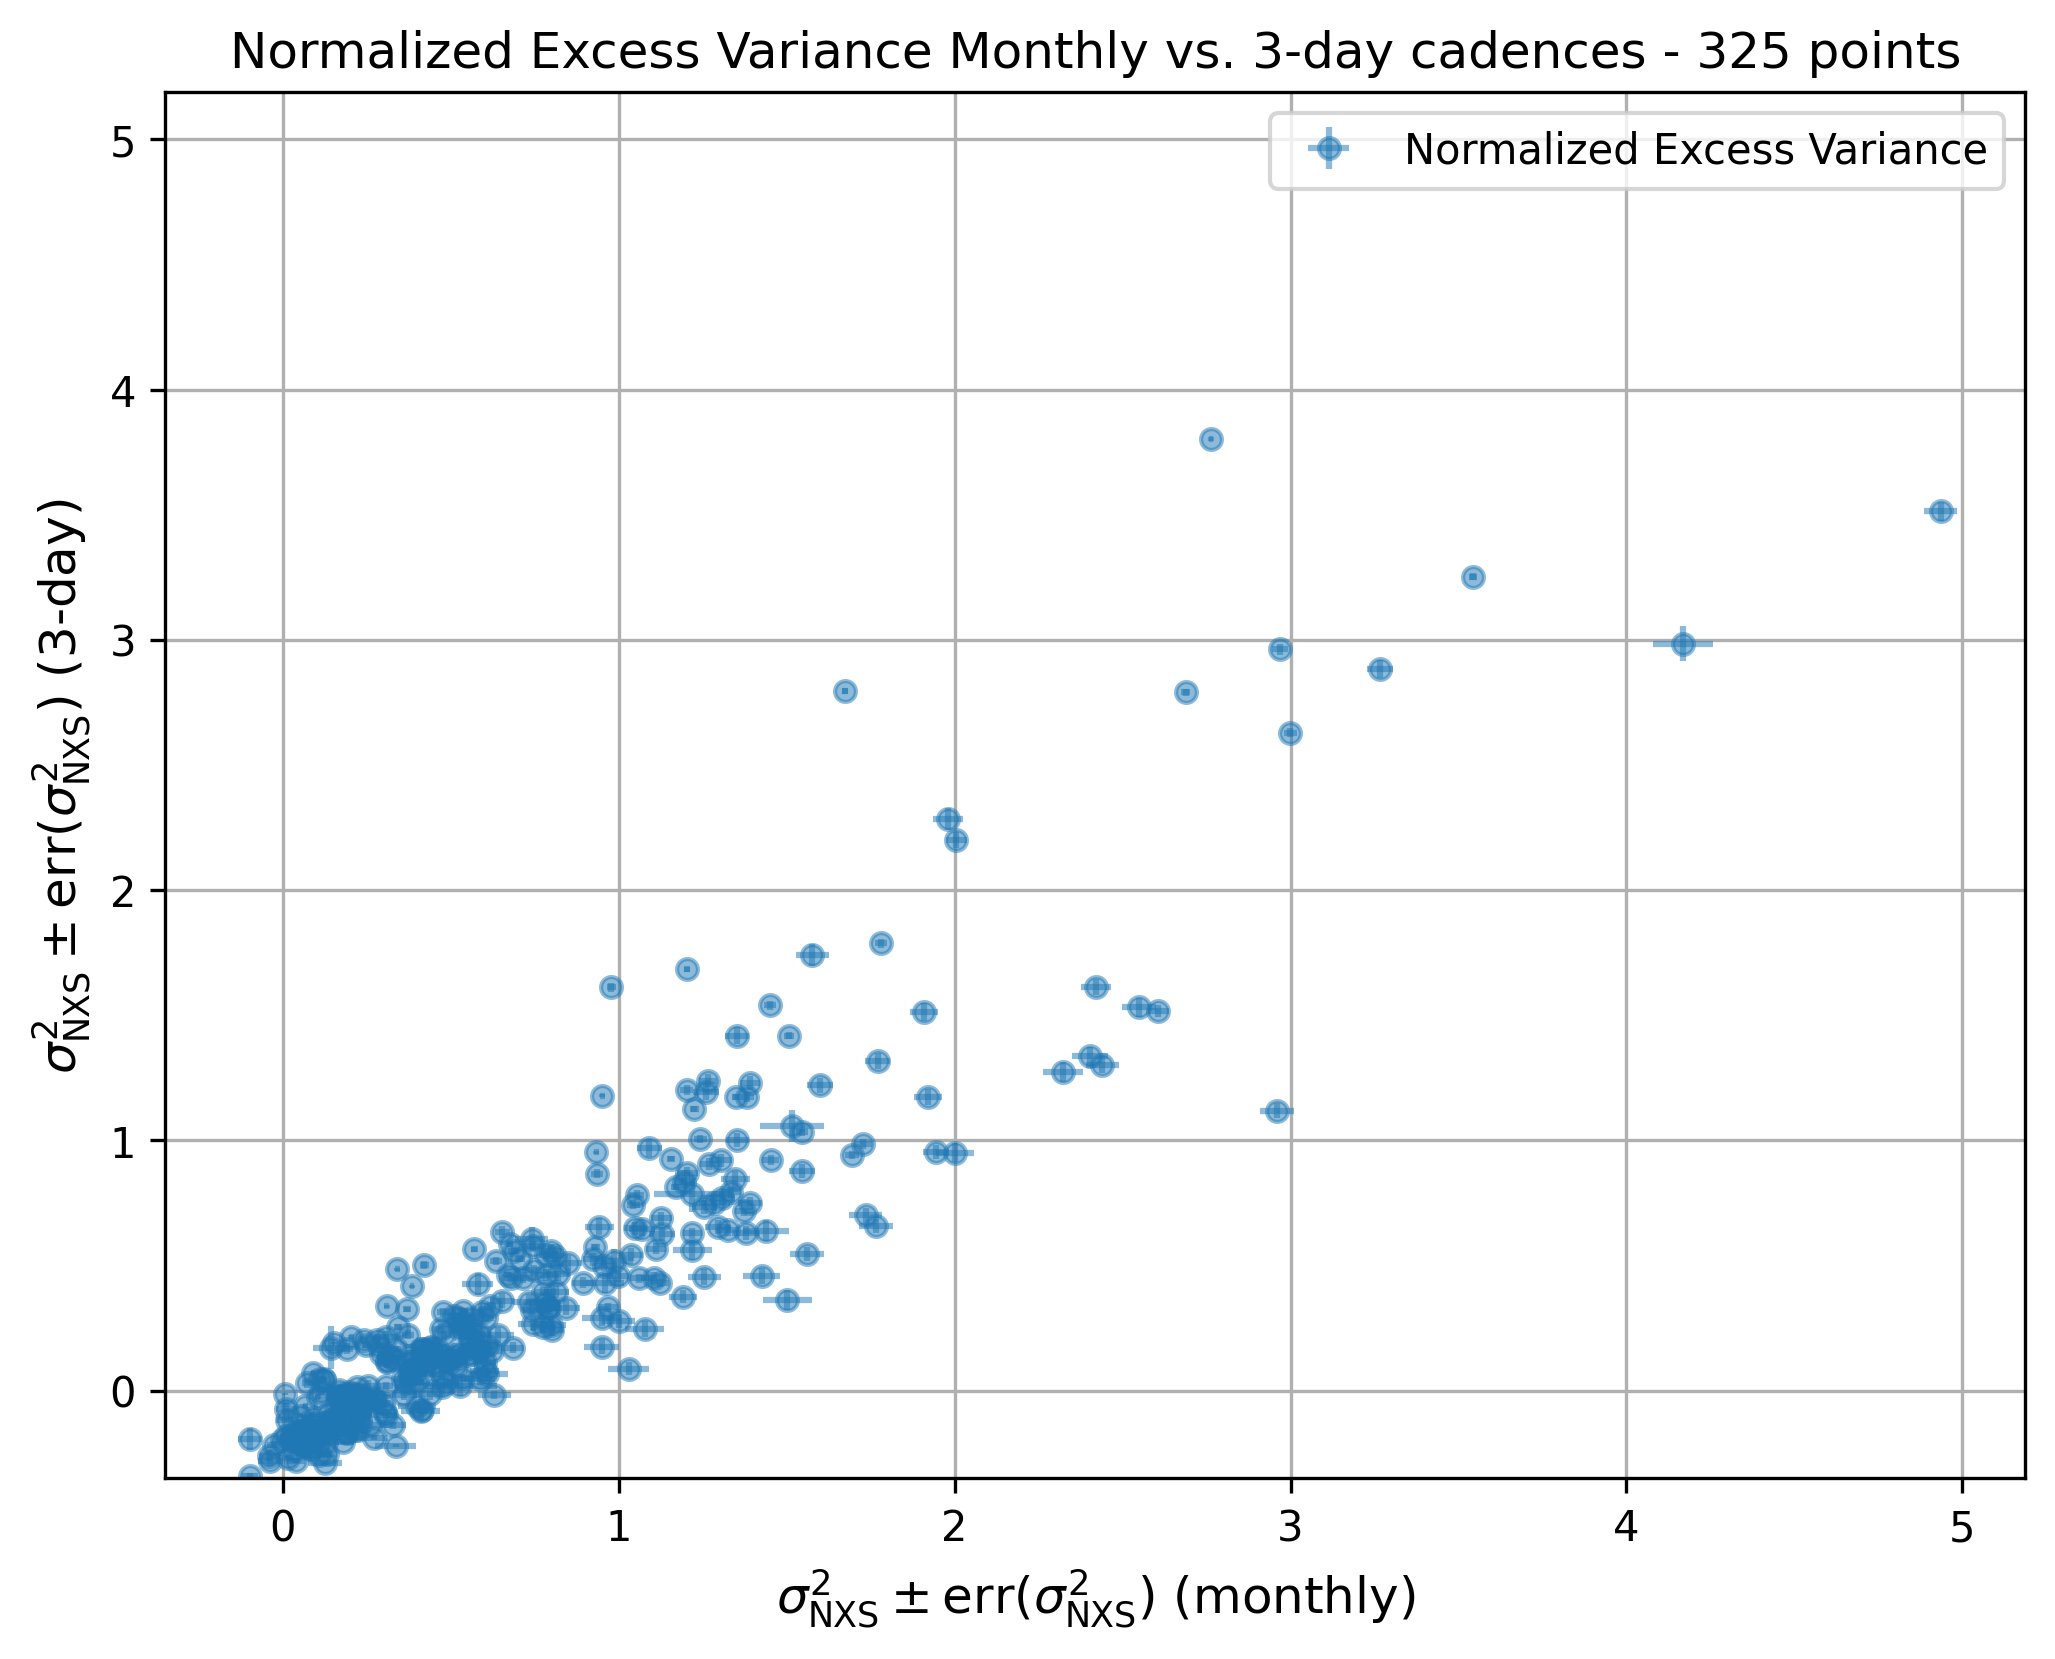

In [53]:
## plot V_NXS(month) +/- eV_NXS(month) versus V_NXS(3-day) +/- eV_NXS(3-day)

plt.figure(figsize=(8,6), dpi=300)

x = df_filtered_4lac_luana_dr3[df_filtered_4lac_luana_dr3['Norm_Excess_Var(3-days)'].notna()]

plt.errorbar(df_filtered_4lac_luana_dr3['Norm_Excess_Var(monthly)'], df_filtered_4lac_luana_dr3['Norm_Excess_Var(3-days)'],
             xerr=df_filtered_4lac_luana_dr3['err_Norm_Excess_Var(monthly)'], yerr=df_filtered_4lac_luana_dr3['err_Norm_Excess_Var(3-days)'],
             fmt='o', markersize=5, alpha=0.5, label='Normalized Excess Variance')

plt.xlabel('$\sigma_{\mathrm{NXS}}^{2} \pm \mathrm{err}(\sigma_{\mathrm{NXS}}^{2})$ (monthly)', fontsize=12)
plt.ylabel('$\sigma_{\mathrm{NXS}}^{2} \pm \mathrm{err}(\sigma_{\mathrm{NXS}}^{2})$ (3-day)', fontsize=12)
plt.title(f'Normalized Excess Variance Monthly vs. 3-day cadences - {len(x)} points', fontsize=12)
plt.legend()

# plt.xscale('log')
# plt.yscale('log')

plt.ylim(plt.xlim())
# plt.xlim(plt.ylim())

plt.grid(True)
plt.savefig('plots/monthly_vs_3days.png',dpi=300)
plt.show()

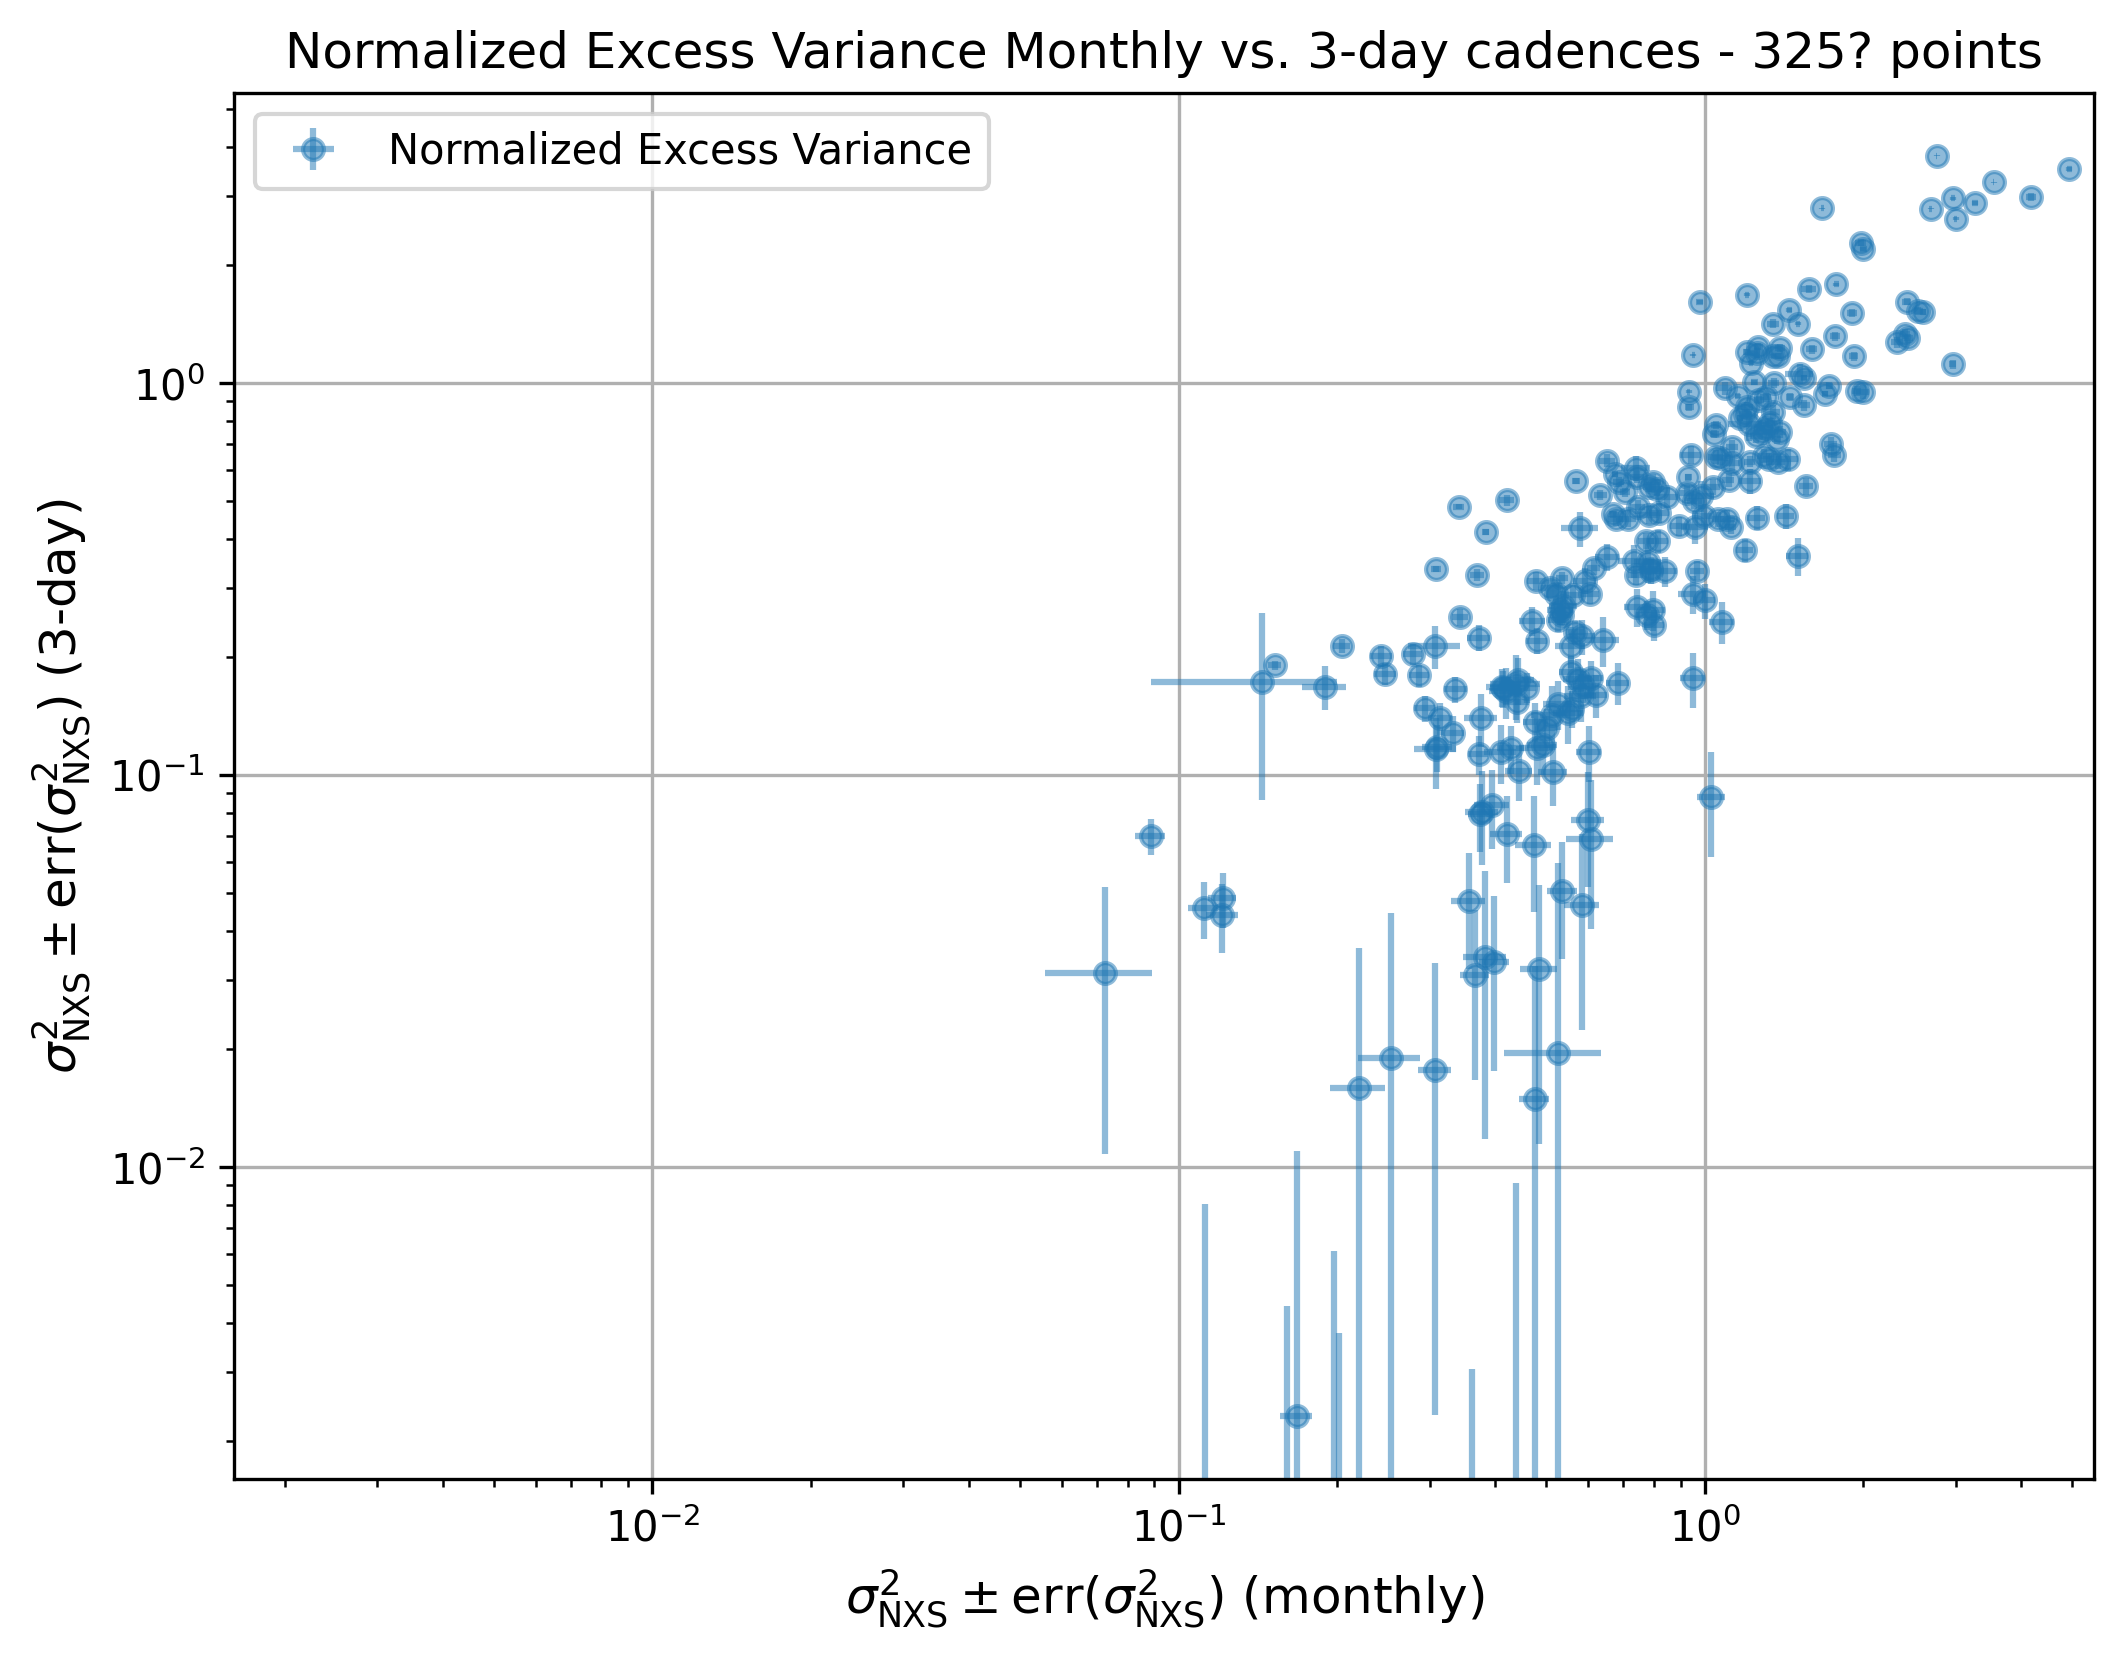

In [54]:
## plot V_NXS(month) +/- eV_NXS(month) versus V_NXS(3-day) +/- eV_NXS(3-day)

plt.figure(figsize=(8,6), dpi=300)

x = df_filtered_4lac_luana_dr3[df_filtered_4lac_luana_dr3['Norm_Excess_Var(3-days)'].notna()]
# x = x[x > 0]

plt.errorbar(df_filtered_4lac_luana_dr3['Norm_Excess_Var(monthly)'], df_filtered_4lac_luana_dr3['Norm_Excess_Var(3-days)'],
             xerr=df_filtered_4lac_luana_dr3['err_Norm_Excess_Var(monthly)'], yerr=df_filtered_4lac_luana_dr3['err_Norm_Excess_Var(3-days)'],
             fmt='o', markersize=5, alpha=0.5, label='Normalized Excess Variance')

plt.xlabel('$\sigma_{\mathrm{NXS}}^{2} \pm \mathrm{err}(\sigma_{\mathrm{NXS}}^{2})$ (monthly)', fontsize=12)
plt.ylabel('$\sigma_{\mathrm{NXS}}^{2} \pm \mathrm{err}(\sigma_{\mathrm{NXS}}^{2})$ (3-day)', fontsize=12)
plt.title(f'Normalized Excess Variance Monthly vs. 3-day cadences - {len(x)}? points', fontsize=12)
plt.legend()

plt.xscale('log')
plt.yscale('log')

plt.xlim(plt.ylim())
# plt.ylim(plt.xlim())

plt.grid(True)
plt.savefig('plots/monthly_vs_3days_log.png',dpi=300)
plt.show()

In [55]:
# x = df_filtered_4lac_luana_dr3[df_filtered_4lac_luana_dr3['Norm_Excess_Var(monthly)'].notna()]
# y = df_filtered_4lac_luana_dr3[df_filtered_4lac_luana_dr3['Norm_Excess_Var(3-days)'].notna()]
# x_err = df_filtered_4lac_luana_dr3[df_filtered_4lac_luana_dr3['err_Norm_Excess_Var(monthly)'].notna()]
# y_err = df_filtered_4lac_luana_dr3[df_filtered_4lac_luana_dr3['err_Norm_Excess_Var(3-days)'].notna()]

In [56]:
x = df_filtered_4lac_luana_dr3['Norm_Excess_Var(monthly)']
y = df_filtered_4lac_luana_dr3['Norm_Excess_Var(3-days)']
x_err = df_filtered_4lac_luana_dr3['err_Norm_Excess_Var(monthly)']
y_err = df_filtered_4lac_luana_dr3['err_Norm_Excess_Var(3-days)']

In [57]:
len(x)

1429

In [58]:
## filter out non-positive values
valid_indices = (x > 0) & (y > 0)

x = x[valid_indices]
y = y[valid_indices]
x_err = x_err[valid_indices]
y_err = y_err[valid_indices]

In [59]:
len(x)

228

In [60]:
## Log transformation
log_x = np.log(x)
log_y = np.log(y)
log_x_err = x_err / x  # relative error in log scale
log_y_err = y_err / y  # relative error in log scale

Fitted parameter: a = 1.3459293331258515


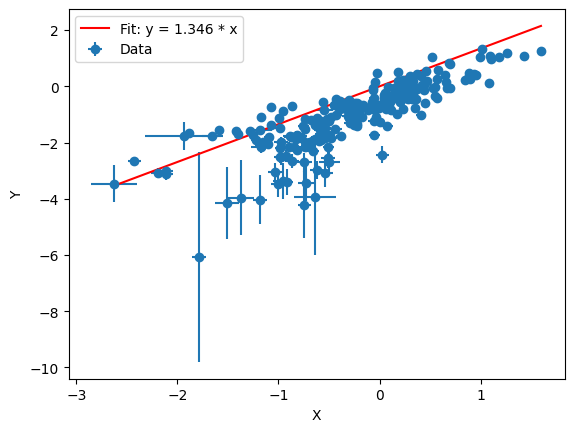

In [80]:
import numpy as np
import scipy.odr as odr
import matplotlib.pyplot as plt

# Define the power-law model y = a * x^b
def power_law_model(B, x):
    return B[0] * x

# Create a model object
power_model = odr.Model(power_law_model)

# Sample data
x_data = log_x  # Your x data here
y_data = log_y  # Your y data here

# Errors for x and y (can be set to uniform small values if unknown)
x_err = log_x_err  # Your x errors here
y_err = log_y_err  # Your y errors here

# Prepare the data for ODR
data = odr.RealData(x_data, y_data, sx=x_err, sy=y_err)

# Set initial guess for the parameters [a, b]
initial_guess = [1.0, 1.0]

# Set up ODR with the model and data
odr_instance = odr.ODR(data, power_model, beta0=initial_guess)

# Run the ODR fitting
output = odr_instance.run()

# Extract the fitted parameters
a, b = output.beta
a = a+0.2
print(f"Fitted parameter: a = {a}")

# Plot the data and the fitted model
x_fit = np.linspace(min(x_data), max(x_data), 1000)
y_fit = power_law_model([a, b], x_fit)

plt.errorbar(x_data, y_data, xerr=x_err, yerr=y_err, fmt='o', label='Data')
plt.plot(x_fit, y_fit, label=f'Fit: y = {a:.3f} * x', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [62]:
from scipy.odr import ODR, Model, RealData

def linear_func(B, x):
    return B[0] * x + B[1]

linear_model = Model(linear_func)
data = RealData(x, y, sx=x_err, sy=y_err)

odr = ODR(data, linear_model, beta0=[1., 2.])
output = odr.run()
output.pprint()

## extract the slope and its uncertainty
slope = output.beta[0]
slope_err = output.sd_beta[0]

intercept = output.beta[1]
intercept_err = output.sd_beta[1]

print(f"Slope: {slope}")
print(f"Slope uncertainty: {slope_err}")
print(f"Residual Variance: {output.res_var}")
print(f"Intercept: {intercept}")
print(f"Intercept uncertainty: {intercept_err}")

Beta: [ 1.29387721 -0.44858433]
Beta Std Error: [0.05100054 0.12085078]
Beta Covariance: [[ 4.45363086e-06 -9.70369402e-06]
 [-9.70369402e-06  2.50071170e-05]]
Residual Variance: 584.0302138650402
Inverse Condition #: 0.13191892369513308
Reason(s) for Halting:
  Sum of squares convergence
Slope: 1.2938772116294988
Slope uncertainty: 0.051000539028336685
Residual Variance: 584.0302138650402
Intercept: -0.4485843335684171
Intercept uncertainty: 0.12085078360954454


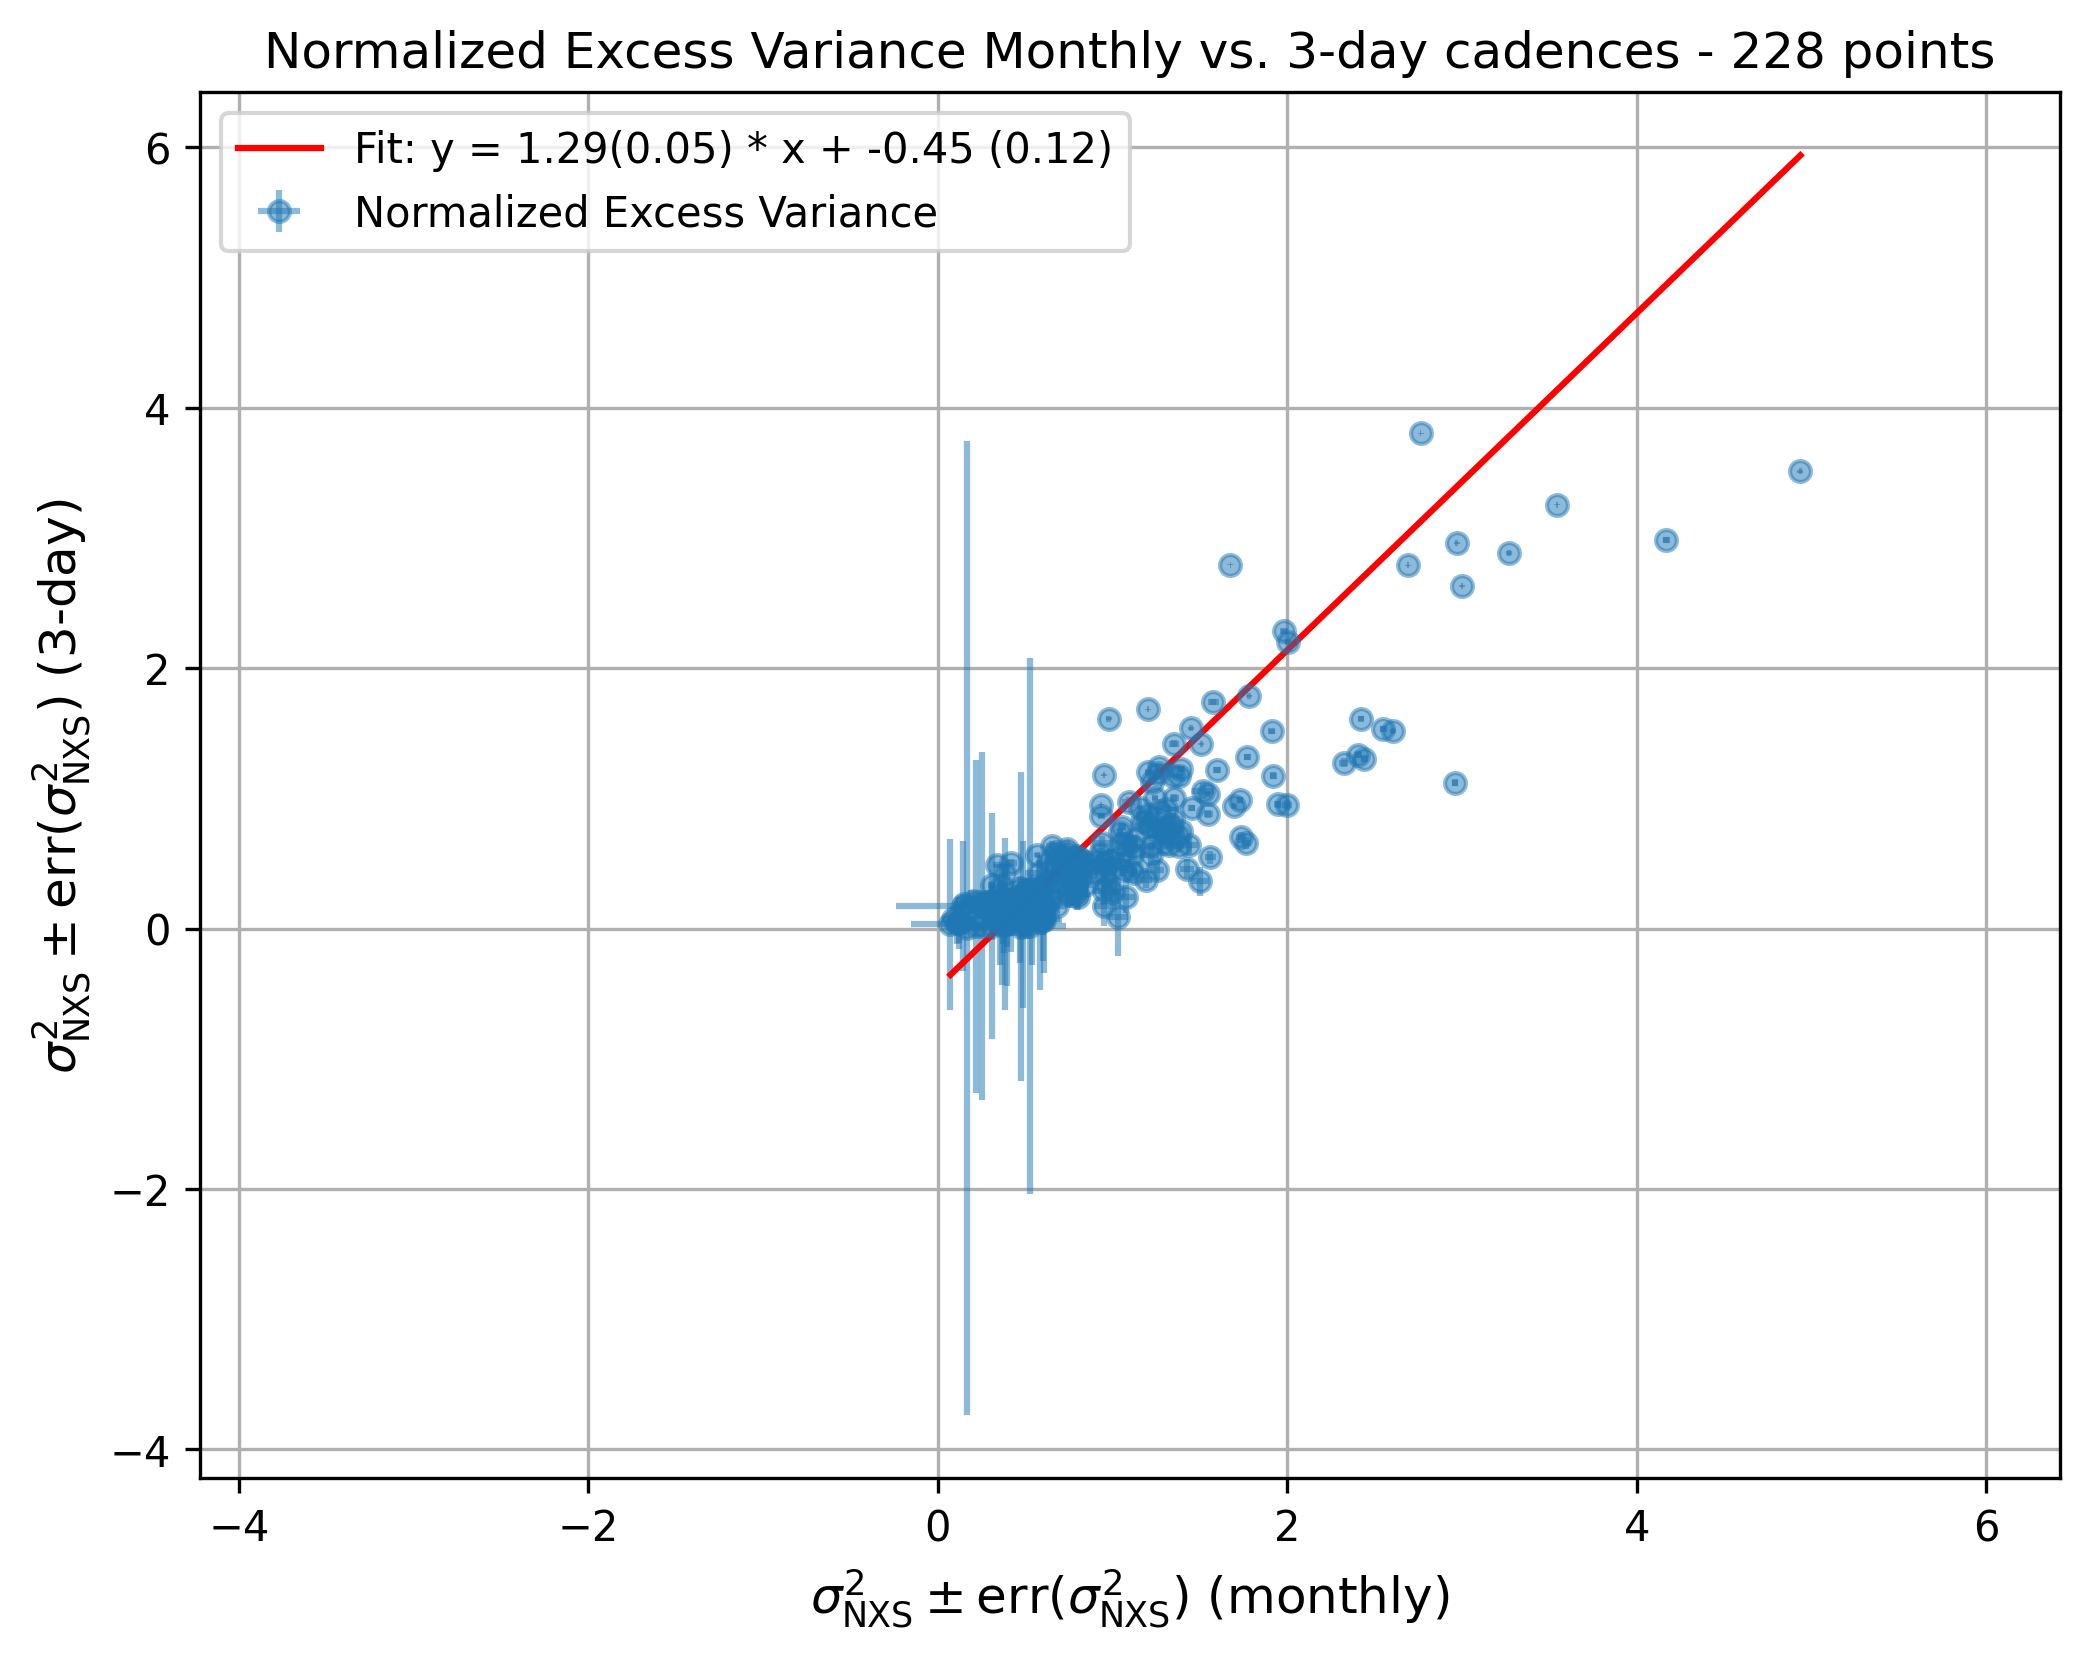

In [63]:
plt.figure(figsize=(8, 6), dpi=300)

plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', markersize=5, alpha=0.5, label='Normalized Excess Variance')

x_fit = np.linspace(min(x), max(x), 100)
y_fit = slope * x_fit + intercept
plt.plot(x_fit, y_fit, color='red', label=f'Fit: y = {slope:.2f}({slope_err:.2f}) * x + {intercept:.2f} ({intercept_err:.2f})')

plt.xlabel('$\sigma_{\mathrm{NXS}}^{2} \pm \mathrm{err}(\sigma_{\mathrm{NXS}}^{2})$ (monthly)', fontsize=12)
plt.ylabel('$\sigma_{\mathrm{NXS}}^{2} \pm \mathrm{err}(\sigma_{\mathrm{NXS}}^{2})$ (3-day)', fontsize=12)
plt.title(f'Normalized Excess Variance Monthly vs. 3-day cadences - {len(x)} points', fontsize=12)
plt.legend()

# plt.xscale('log')
# plt.yscale('log')

plt.xlim(plt.ylim())
# plt.ylim(plt.xlim())

plt.savefig('plots/monthly_vs_3days_fit.png')

plt.grid(True)
plt.show()

In [64]:
def linear_func(B, x):
    return B[0] * x + B[1]

linear_model = Model(linear_func)
data = RealData(log_x, log_y, sx=log_x_err, sy=log_y_err)

odr = ODR(data, linear_model, beta0=[1., 2.])
output = odr.run()
output.pprint()

## extract the slope and its uncertainty
slope = output.beta[0]
slope_err = output.sd_beta[0]

intercept = output.beta[1]
intercept_err = output.sd_beta[1]

print(f"Slope: {slope}")
print(f"Slope uncertainty: {slope_err}")
print(f"Residual Variance: {output.res_var}")
print(f"Intercept: {intercept}")
print(f"Intercept uncertainty: {intercept_err}")

Beta: [ 1.32308615 -0.19897159]
Beta Std Error: [0.04292998 0.03626678]
Beta Covariance: [[ 1.33041338e-05 -8.57030180e-06]
 [-8.57030180e-06  9.49474420e-06]]
Residual Variance: 138.52712460588597
Inverse Condition #: 0.33494797344694094
Reason(s) for Halting:
  Sum of squares convergence
Slope: 1.3230861537733463
Slope uncertainty: 0.04292998249174771
Residual Variance: 138.52712460588597
Intercept: -0.19897158556585462
Intercept uncertainty: 0.036266783881323525


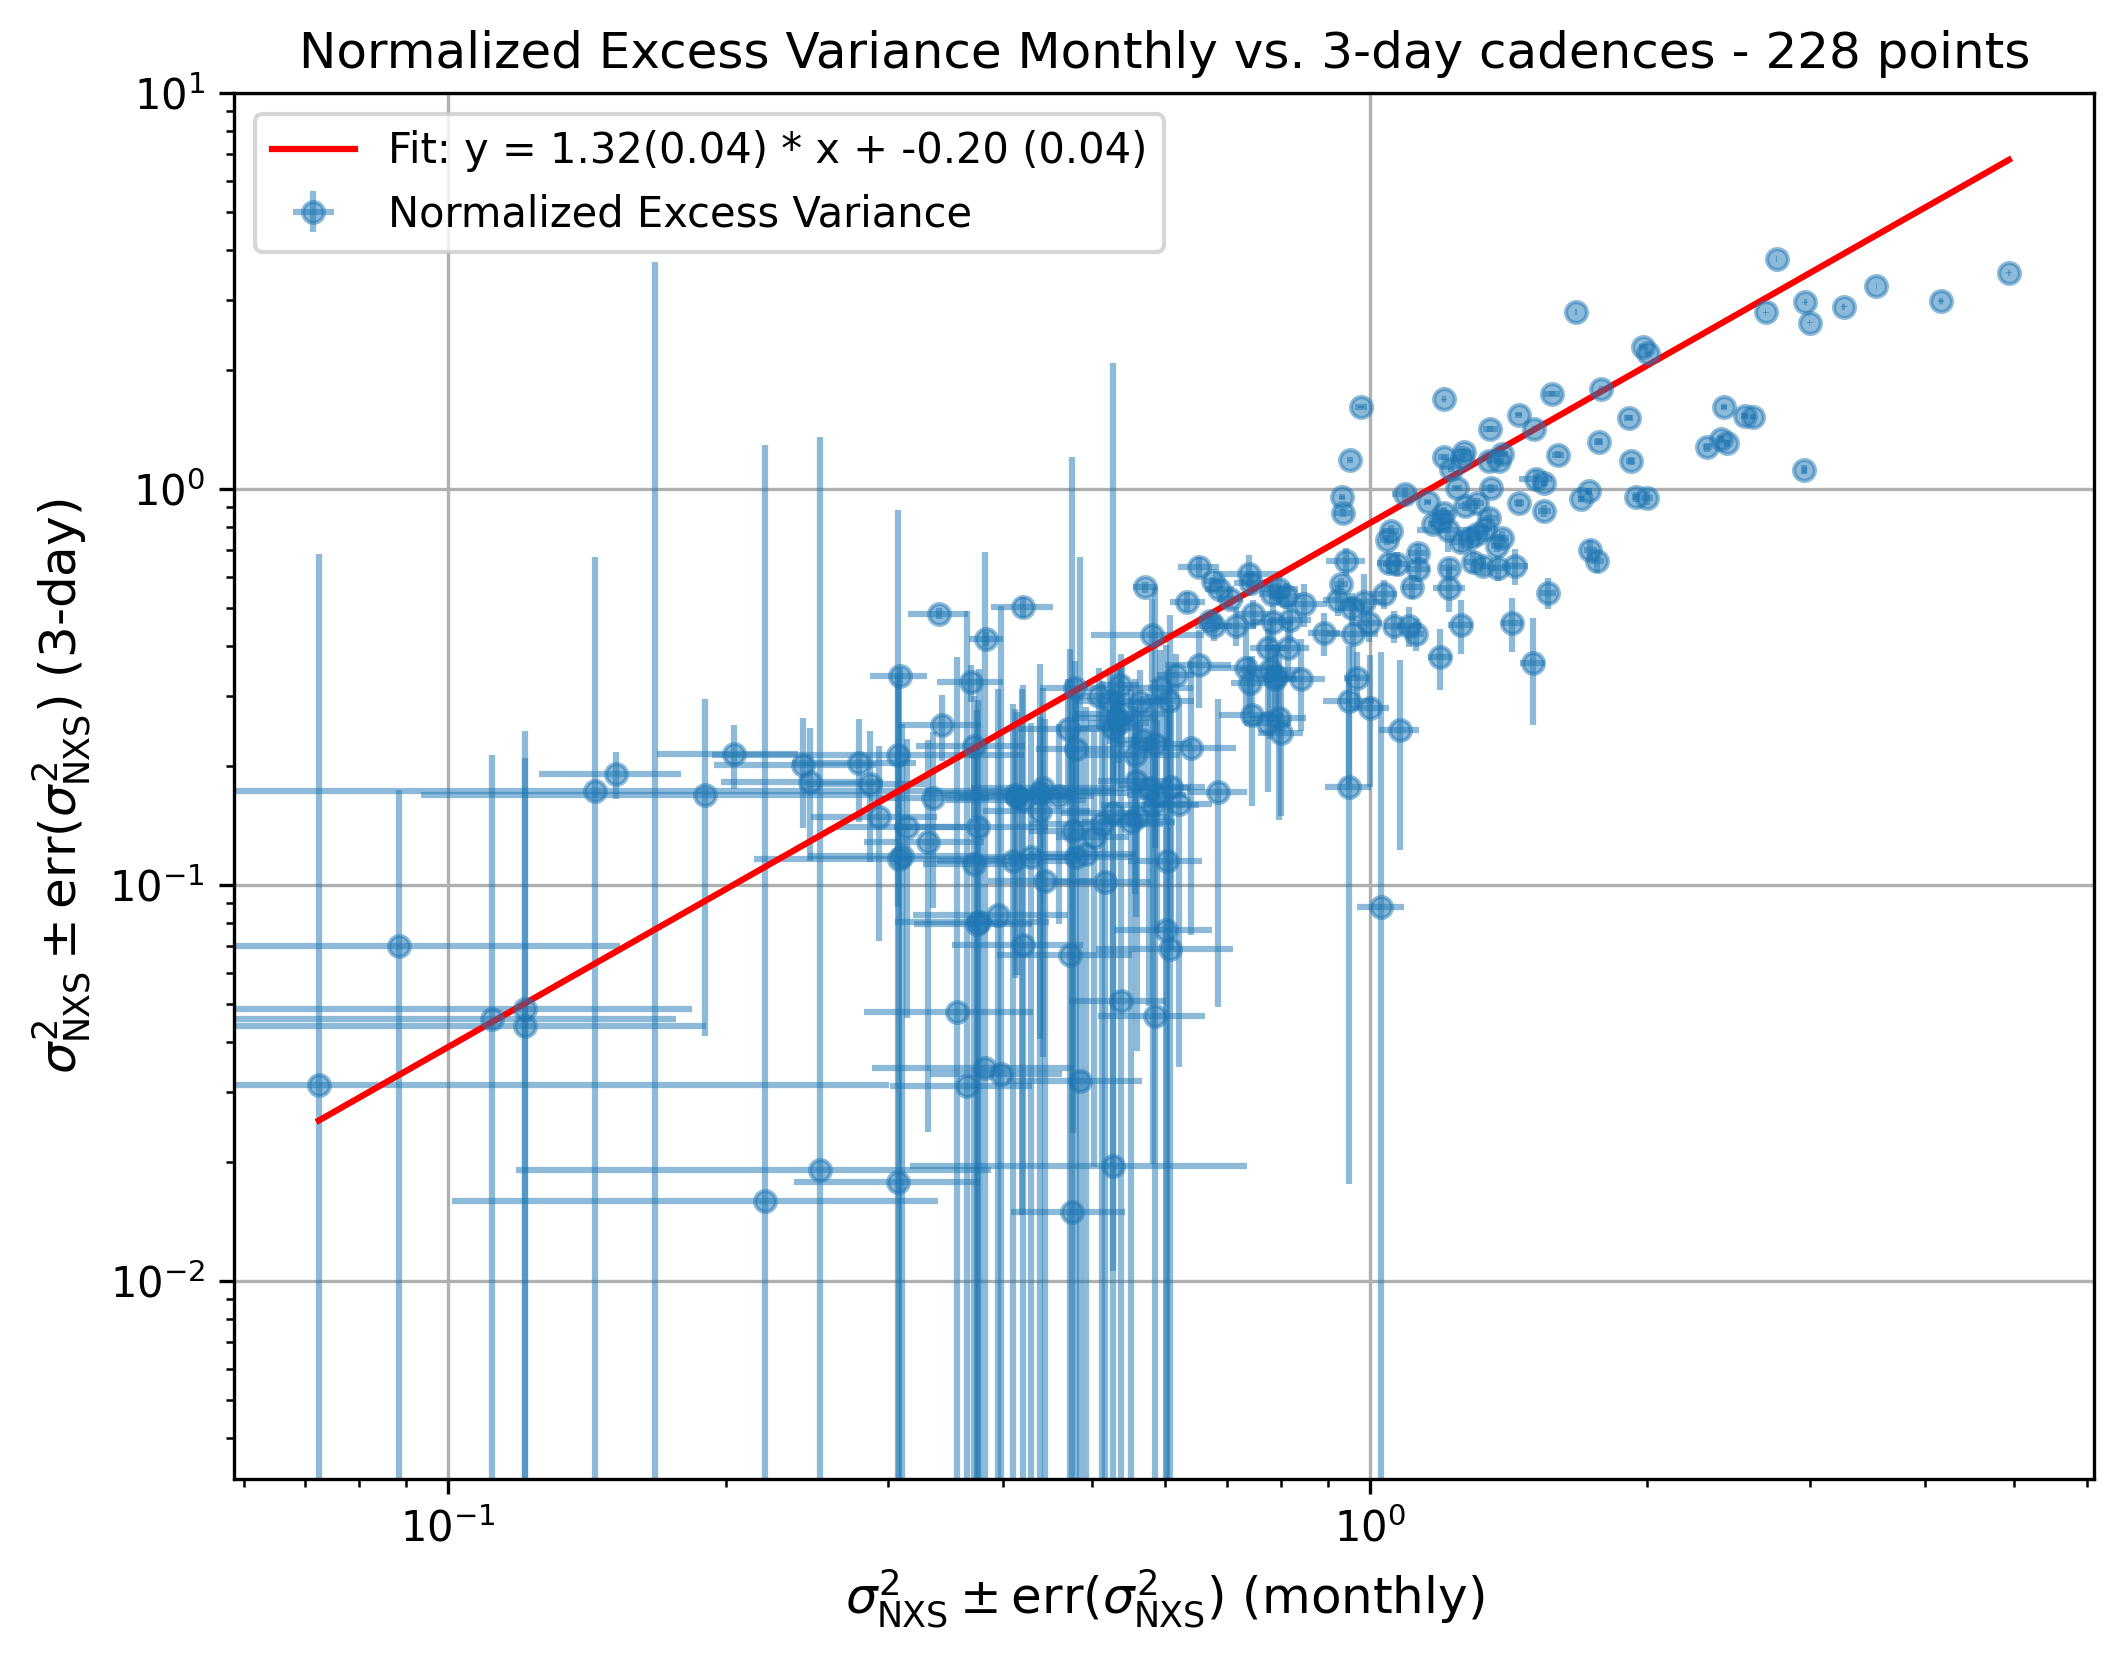

In [65]:
plt.figure(figsize=(8, 6), dpi=300)

# Plotting the data with error bars
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', markersize=5, alpha=0.5, label='Normalized Excess Variance')

# Plotting the regression line
x_fit = np.linspace(min(x), max(x), 100)
log_x_fit = np.log(x_fit)
log_y_fit = slope * log_x_fit + intercept
y_fit = np.exp(log_y_fit)
plt.plot(x_fit, y_fit, color='red', label=f'Fit: y = {slope:.2f}({slope_err:.2f}) * x + {intercept:.2f} ({intercept_err:.2f})')
# plt.plot(x_fit, y_fit, color='purple', label=f'Fit: y = {np.exp(intercept):.2e} * x^{slope:.2f}')

plt.xlabel('$\sigma_{\mathrm{NXS}}^{2} \pm \mathrm{err}(\sigma_{\mathrm{NXS}}^{2})$ (monthly)', fontsize=12)
plt.ylabel('$\sigma_{\mathrm{NXS}}^{2} \pm \mathrm{err}(\sigma_{\mathrm{NXS}}^{2})$ (3-day)', fontsize=12)
plt.title(f'Normalized Excess Variance Monthly vs. 3-day cadences - {len(log_x)} points', fontsize=12)
plt.legend()

plt.xscale('log')
plt.yscale('log')

plt.ylim(10**(-2.5),1e1)

plt.savefig('plots/monthly_vs_3days_log_fit.png')

plt.grid(True)
plt.show()

In [66]:
# ## test

# x = df_filtered_4lac_luana_dr3['Norm_Excess_Var(monthly-t)']
# x_err = df_filtered_4lac_luana_dr3['err_Norm_Excess_Var(monthly-t)']
# print(len(x))

# valid_indices = (x > 0) & (y > 0)
# x = x[valid_indices]
# x_err = x_err[valid_indices]
# print(len(x))

# ## Log transformation
# log_x = np.log(x)
# log_x_err = x_err / x  # relative error in log scale

In [67]:
# ## test

# plt.figure(figsize=(8, 6), dpi=300)

# # Plotting the data with error bars
# plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', markersize=5, alpha=0.5, label='Normalized Excess Variance')

# # Plotting the regression line
# x_fit = np.linspace(min(x), max(x), 100)
# log_x_fit = np.log(x_fit)
# log_y_fit = slope * log_x_fit + intercept
# y_fit = np.exp(log_y_fit)
# plt.plot(x_fit, y_fit, color='red', label=f'Fit: y = {slope:.2f}({slope_err:.2f}) * x + {intercept:.2f} ({intercept_err:.2f})')
# # plt.plot(x_fit, y_fit, color='purple', label=f'Fit: y = {np.exp(intercept):.2e} * x^{slope:.2f}')

# plt.xlabel('TEST: $\sigma_{\mathrm{NXS}}^{2} \pm \mathrm{err}(\sigma_{\mathrm{NXS}}^{2})$ (monthly)', fontsize=12)
# plt.ylabel('$\sigma_{\mathrm{NXS}}^{2} \pm \mathrm{err}(\sigma_{\mathrm{NXS}}^{2})$ (3-day)', fontsize=12)
# plt.title(f'Normalized Excess Variance TEST Monthly vs. 3-day cadences - {len(log_x)} points', fontsize=12)
# plt.legend()

# plt.xscale('log')
# plt.yscale('log')

# plt.ylim(10**(-2.5),1e1)

# # plt.savefig('plots/monthly_vs_3days_log_fit.png')

# plt.grid(True)
# plt.show()

In [68]:
len()

TypeError: len() takes exactly one argument (0 given)

In [ ]:
df_filtered_4lac_luana_dr3

In [ ]:
df_4lac_luana_dr3

In [ ]:
table_4lac_luana_dr3 = Table.from_pandas(df_4lac_luana_dr3)
table_filtered_4lac_luana_dr3 = Table.from_pandas(df_filtered_4lac_luana_dr3) 

table_4lac_luana_dr3.write('./resulting_catalogs/df_4lac_luana_dr3.fits', format='fits', overwrite=True)
table_4lac_luana_dr3.write('./resulting_catalogs/df_4lac_luana_dr3.ecsv', format='ascii.ecsv', overwrite=True)
table_filtered_4lac_luana_dr3.write('./resulting_catalogs/df_filtered_4lac_luana_dr3.fits', format='fits', overwrite=True)
table_filtered_4lac_luana_dr3.write('./resulting_catalogs/df_filtered_4lac_luana_dr3.ecsv', format='ascii.ecsv', overwrite=True)

In [ ]:
## plotting a few to check

for source_name in df_subset_3days['Source_Name'][:5]:
    
    file_name = f'4FGL+{source_name}.json'
    source_data = Read_json_file(file_name, '3-days', 'fixed')
    source_df = source_data.dataframe
    source_dict = source_data.dictionary
    
    filtered_df = filter_source_flux(source_df)
    
    plots = Plots(file_name[5:-5], df_agn_pop_4lac_dr3, source_dict, filtered_df)
    plots.lightcurve_complete('3-days', 1.1e-6)
    plots.lightcurve_filtered('3-days', 1.1e-6)
    # plots.spectrum(power=12, x_dlim=0.06, x_ulim=120, y_dlim=10, y_ulim=150)
    plots.exposure()

In [ ]:
## plotting a few to check

for source_name in df_subset_monthly['Source_Name'][:5]:
    
    file_name = f'4FGL+{source_name}.json'
    source_data = Read_json_file(file_name, 'monthly', 'fixed')
    source_df = source_data.dataframe
    source_dict = source_data.dictionary
    
    filtered_df = filter_source_flux(source_df)
    
    plots = Plots(file_name[5:-5], df_agn_pop_4lac_dr3, source_dict, filtered_df)
    plots.lightcurve_complete('monthly', 1.1e-7)
    plots.lightcurve_filtered('monthly', 1.1e-7)
    # plots.spectrum(power=12, x_dlim=0.06, x_ulim=120, y_dlim=10, y_ulim=150)
    plots.exposure()

##